In [3]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api 

## Data Set Up

In [20]:
# Import Data
us_diff = pd.read_csv('univariate_datasets/us_diff.csv', usecols=[1,2], index_col=0, parse_dates=[0])
us = pd.read_csv('univariate_datasets/univariate_df_United_States.csv',usecols=[1,2], index_col=0, parse_dates=[0])
belgium = pd.read_csv('univariate_datasets/univariate_df_Belgium.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
chile = pd.read_csv('univariate_datasets/univariate_df_Chile.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
czechia = pd.read_csv('univariate_datasets/univariate_df_Czechia.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
estonia = pd.read_csv('univariate_datasets/univariate_df_Estonia.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
france = pd.read_csv('univariate_datasets/univariate_df_France.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
ireland = pd.read_csv('univariate_datasets/univariate_df_Ireland.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
israel = pd.read_csv('univariate_datasets/univariate_df_Israel.csv', belgiumecols=[1,2], index_col = 0, parse_dates = [0])
italy = pd.read_csv('univariate_datasets/univariate_df_Italy.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
malaysia = pd.read_csv('univariate_datasets/univariate_df_Malaysia.csv', usecols=[1,2], index_col = 0, parse_dates = [0])
# test_train split
train_size = int(len(us)*0.8)

czechia_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
czechia_df['actual'] = czechia['new_deaths']
estonia_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
estonia_df['actual'] = estonia['new_deaths']
france_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
france_df['actual'] = france['new_deaths']
malaysia_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
malaysia_df['actual'] = malaysia['new_deaths']
us_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
us_df['actual'] = us['new_deaths']
belgium_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
belgium_df['actual'] = belgium['new_deaths']
chile_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
chile_df['actual'] = chile['new_deaths']
ireland_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
ireland_df['actual'] = ireland['new_deaths']
israel_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
israel_df['actual'] = israel['new_deaths']
italy_df = pd.DataFrame(columns = ['actual','baseline', 'grid_search', 'seasonal'])
italy_df['actual'] = italy['new_deaths']

small_constant = 1
def mape(y_true, prediction):
    return np.mean(np.abs((y_true - prediction) / (y_true + small_constant))) * 100

evaluation = pd.DataFrame(columns = ['Country','Model', 'MAE', 'MAPE'])

# US

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.59378D+00    |proj g|=  2.00047D-01

At iterate    5    f=  8.47410D+00    |proj g|=  1.83373D-02

At iterate   10    f=  8.46670D+00    |proj g|=  6.35661D-04

At iterate   15    f=  8.46664D+00    |proj g|=  1.66966D-03

At iterate   20    f=  8.46340D+00    |proj g|=  2.47258D-02

At iterate   25    f=  8.41419D+00    |proj g|=  2.39235D-02

At iterate   30    f=  8.39444D+00    |proj g|=  1.06128D-02

At iterate   35    f=  8.39429D+00    |proj g|=  1.18384D-03

At iterate   40    f=  8.39415D+00    |proj g|=  5.08147D-03

At iterate   45    f=  8.39409D+00    |proj g|=  1.07489D-03

At iterate   50    f=  8.39408D+00    |proj g|=  6.42738D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54458D+00    |proj g|=  2.06800D-01

At iterate    5    f=  8.46743D+00    |proj g|=  1.76749D-02

At iterate   10    f=  8.46552D+00    |proj g|=  7.28995D-04

At iterate   15    f=  8.46530D+00    |proj g|=  3.20283D-03

At iterate   20    f=  8.46520D+00    |proj g|=  2.33019D-04

At iterate   25    f=  8.46506D+00    |proj g|=  2.45414D-03

At iterate   30    f=  8.44923D+00    |proj g|=  1.38081D-01

At iterate   35    f=  8.39519D+00    |proj g|=  2.31105D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf

 This problem is unconstrained.



At iterate   20    f=  8.46422D+00    |proj g|=  1.51932D-02

At iterate   25    f=  8.40010D+00    |proj g|=  7.54760D-02

At iterate   30    f=  8.39230D+00    |proj g|=  1.57857D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     39      1     0     0   1.822D-06   8.392D+00
  F =   8.3921235841285693     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.54940D+00    |proj g|=  2.12793D-01


 This problem is unconstrained.



At iterate    5    f=  8.46858D+00    |proj g|=  2.71796D-02

At iterate   10    f=  8.46542D+00    |proj g|=  1.15220D-03

At iterate   15    f=  8.46532D+00    |proj g|=  3.15641D-03

At iterate   20    f=  8.46517D+00    |proj g|=  2.52389D-04

At iterate   25    f=  8.46508D+00    |proj g|=  2.42824D-03

At iterate   30    f=  8.45691D+00    |proj g|=  2.89809D-02

At iterate   35    f=  8.39364D+00    |proj g|=  1.17715D-02

At iterate   40    f=  8.39315D+00    |proj g|=  3.66810D-03

At iterate   45    f=  8.39303D+00    |proj g|=  6.17135D-04

At iterate   50    f=  8.39223D+00    |proj g|=  1.67541D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  8.39394D+00    |proj g|=  1.65017D-02

At iterate   15    f=  8.39336D+00    |proj g|=  6.48203D-03

At iterate   20    f=  8.39330D+00    |proj g|=  1.94918D-04

At iterate   25    f=  8.39329D+00    |proj g|=  3.29898D-03

At iterate   30    f=  8.39136D+00    |proj g|=  3.78540D-02

At iterate   35    f=  8.36403D+00    |proj g|=  3.82149D-02

At iterate   40    f=  8.35956D+00    |proj g|=  1.10008D-03

At iterate   45    f=  8.35904D+00    |proj g|=  1.34543D-02

At iterate   50    f=  8.35845D+00    |proj g|=  4.33504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate   10    f=  8.39232D+00    |proj g|=  1.92114D-03

At iterate   15    f=  8.39220D+00    |proj g|=  6.54120D-03

At iterate   20    f=  8.39195D+00    |proj g|=  5.77563D-03

At iterate   25    f=  8.39178D+00    |proj g|=  1.96623D-04

At iterate   30    f=  8.39177D+00    |proj g|=  6.46940D-04

At iterate   35    f=  8.39087D+00    |proj g|=  5.20028D-02

At iterate   40    f=  8.36687D+00    |proj g|=  5.81043D-02

At iterate   45    f=  8.35840D+00    |proj g|=  6.58803D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     47     50      1     0     0   1.726D-05   8.358D+00
  F =   8.35840009190

 This problem is unconstrained.



At iterate   20    f=  8.39312D+00    |proj g|=  3.07302D-04

At iterate   25    f=  8.39312D+00    |proj g|=  6.76576D-04

At iterate   30    f=  8.39277D+00    |proj g|=  9.21273D-03

At iterate   35    f=  8.36850D+00    |proj g|=  7.91780D-02

At iterate   40    f=  8.35878D+00    |proj g|=  5.88467D-03

At iterate   45    f=  8.35801D+00    |proj g|=  1.64646D-03

At iterate   50    f=  8.35792D+00    |proj g|=  8.75364D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     56      1     0     0   8.754D-04   8.358D+00
  F =   8.3579197473094862     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  8.39076D+00    |proj g|=  1.66015D-03

At iterate   20    f=  8.39072D+00    |proj g|=  4.17850D-03

At iterate   25    f=  8.39065D+00    |proj g|=  1.97903D-04

At iterate   30    f=  8.39064D+00    |proj g|=  1.09089D-03

At iterate   35    f=  8.38911D+00    |proj g|=  2.68015D-02

At iterate   40    f=  8.35850D+00    |proj g|=  1.32770D-02

At iterate   45    f=  8.35736D+00    |proj g|=  3.07775D-03

At iterate   50    f=  8.35712D+00    |proj g|=  6.77575D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   6.776D-03   8.357D+00
  F =   8.35711934913

 This problem is unconstrained.



At iterate   25    f=  8.42626D+00    |proj g|=  7.53067D-02

At iterate   30    f=  8.36646D+00    |proj g|=  1.89057D-02

At iterate   35    f=  8.36408D+00    |proj g|=  2.05846D-03

At iterate   40    f=  8.36373D+00    |proj g|=  5.37765D-04

At iterate   45    f=  8.36370D+00    |proj g|=  7.00837D-04

At iterate   50    f=  8.36369D+00    |proj g|=  4.87672D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   4.877D-05   8.364D+00
  F =   8.3636896658485007     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  8.43831D+00    |proj g|=  1.22344D-03

At iterate   20    f=  8.43824D+00    |proj g|=  2.44230D-04

At iterate   25    f=  8.43814D+00    |proj g|=  2.78433D-03

At iterate   30    f=  8.43113D+00    |proj g|=  2.72064D-02

At iterate   35    f=  8.36735D+00    |proj g|=  1.28197D-02

At iterate   40    f=  8.36658D+00    |proj g|=  8.76147D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     47      1     0     0   9.150D-06   8.367D+00
  F =   8.3665762652609885     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  8.44109D+00    |proj g|=  1.48798D-02

At iterate   15    f=  8.44028D+00    |proj g|=  8.80635D-04

At iterate   20    f=  8.44027D+00    |proj g|=  1.67593D-03

At iterate   25    f=  8.43881D+00    |proj g|=  2.64602D-02

At iterate   30    f=  8.39373D+00    |proj g|=  1.31322D-01

At iterate   35    f=  8.36668D+00    |proj g|=  3.45601D-02

At iterate   40    f=  8.36482D+00    |proj g|=  4.68139D-03

At iterate   45    f=  8.36366D+00    |proj g|=  1.85454D-03

At iterate   50    f=  8.36346D+00    |proj g|=  1.35286D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate   10    f=  8.43837D+00    |proj g|=  1.30264D-03

At iterate   15    f=  8.43832D+00    |proj g|=  8.87292D-04

At iterate   20    f=  8.43823D+00    |proj g|=  1.37504D-03

At iterate   25    f=  8.43821D+00    |proj g|=  7.81696D-04

At iterate   30    f=  8.43591D+00    |proj g|=  1.20843D-02

At iterate   35    f=  8.39960D+00    |proj g|=  4.93967D-02

At iterate   40    f=  8.36841D+00    |proj g|=  5.43759D-02

At iterate   45    f=  8.36220D+00    |proj g|=  2.40968D-02

At iterate   50    f=  8.36042D+00    |proj g|=  1.05981D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58   

 This problem is unconstrained.



At iterate    5    f=  8.40880D+00    |proj g|=  1.04017D-01

At iterate   10    f=  8.39338D+00    |proj g|=  1.74484D-02

At iterate   15    f=  8.39254D+00    |proj g|=  2.68241D-03

At iterate   20    f=  8.39252D+00    |proj g|=  2.25572D-04

At iterate   25    f=  8.39251D+00    |proj g|=  2.71710D-04

At iterate   30    f=  8.39249D+00    |proj g|=  3.22695D-03

At iterate   35    f=  8.39108D+00    |proj g|=  1.05093D-02

At iterate   40    f=  8.36669D+00    |proj g|=  2.73791D-02

At iterate   45    f=  8.36388D+00    |proj g|=  6.69894D-03

At iterate   50    f=  8.36238D+00    |proj g|=  1.69058D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  8.39131D+00    |proj g|=  6.84698D-03

At iterate   20    f=  8.39110D+00    |proj g|=  2.59420D-03

At iterate   25    f=  8.39090D+00    |proj g|=  1.48380D-03

At iterate   30    f=  8.39088D+00    |proj g|=  2.58356D-04

At iterate   35    f=  8.39080D+00    |proj g|=  2.19312D-03

At iterate   40    f=  8.38775D+00    |proj g|=  4.86224D-02

At iterate   45    f=  8.38137D+00    |proj g|=  1.70235D-02

At iterate   50    f=  8.37130D+00    |proj g|=  1.46550D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   1.466D-02   8.371D+00
  F =   8.37130284082

 This problem is unconstrained.



At iterate   15    f=  8.39248D+00    |proj g|=  6.39148D-03

At iterate   20    f=  8.39236D+00    |proj g|=  6.69799D-04

At iterate   25    f=  8.39234D+00    |proj g|=  1.93985D-04

At iterate   30    f=  8.39233D+00    |proj g|=  6.56117D-04

At iterate   35    f=  8.39125D+00    |proj g|=  2.29697D-02

At iterate   40    f=  8.36914D+00    |proj g|=  3.57262D-02

At iterate   45    f=  8.35992D+00    |proj g|=  1.18009D-02

At iterate   50    f=  8.35843D+00    |proj g|=  3.21856D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   3.219D-03   8.358D+00
  F =   8.35842634958

 This problem is unconstrained.



At iterate   15    f=  8.38989D+00    |proj g|=  1.37462D-03

At iterate   20    f=  8.38986D+00    |proj g|=  6.87005D-04

At iterate   25    f=  8.38982D+00    |proj g|=  2.76457D-03

At iterate   30    f=  8.38979D+00    |proj g|=  1.60599D-03

At iterate   35    f=  8.38978D+00    |proj g|=  2.87356D-04

At iterate   40    f=  8.38975D+00    |proj g|=  9.95778D-04

At iterate   45    f=  8.38967D+00    |proj g|=  4.32962D-03

At iterate   50    f=  8.38783D+00    |proj g|=  1.74577D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     55      1     0     0   1.746D-02   8.388D+00
  F =   8.38783359577

 This problem is unconstrained.



At iterate   25    f=  8.39329D+00    |proj g|=  3.29898D-03

At iterate   30    f=  8.39136D+00    |proj g|=  3.78540D-02

At iterate   35    f=  8.36403D+00    |proj g|=  3.82149D-02

At iterate   40    f=  8.35956D+00    |proj g|=  1.10008D-03

At iterate   45    f=  8.35904D+00    |proj g|=  1.34543D-02

At iterate   50    f=  8.35845D+00    |proj g|=  4.33504D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55      1     0     0   4.335D-03   8.358D+00
  F =   8.3584513248526768     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


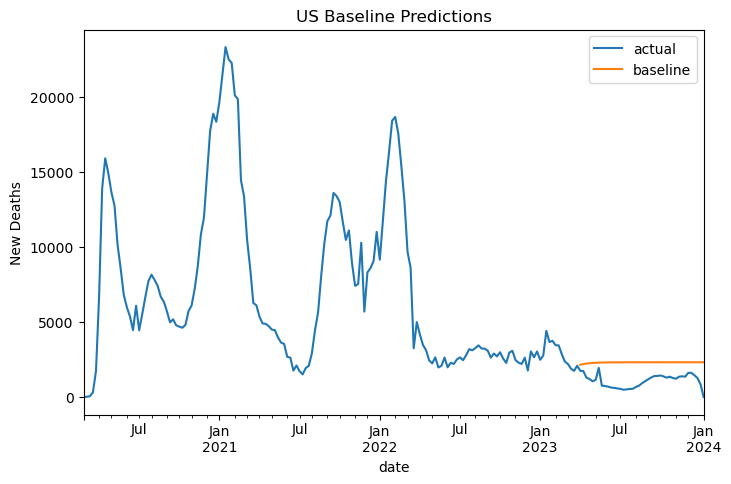

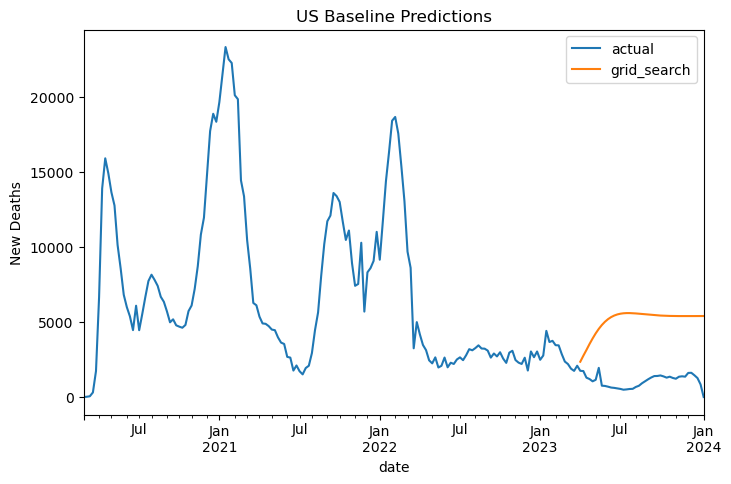

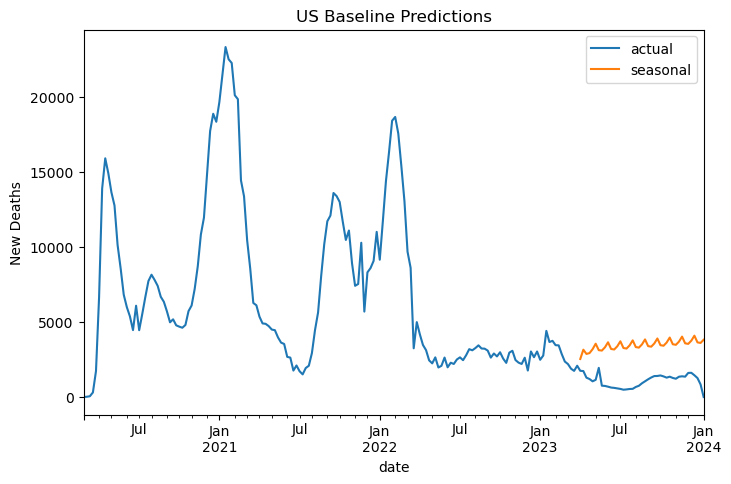

In [23]:
# train test split
us_train, us_test = us[0:train_size], us[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(us_train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
us_prediction=model_fit.predict(start=train_size,end = 201, dynamic=True)
us_df['baseline'] = us_prediction

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(us_train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(us_train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

us_prediction = model_fit.predict(start=train_size, end = 201,dynamic=True)
us_df['grid_search'] = us_prediction

#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4))
model_fit=model.fit()
us_prediction = model_fit.predict(start=train_size, end=201, dynamic=True)
us_df['seasonal'] = us_prediction

#plots
us_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('US Baseline Predictions')
plt.ylabel('New Deaths')

us_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('US Tuned Predictions')
plt.ylabel('New Deaths')

us_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('US Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
baseline_mae = mean_absolute_error(us_test['new_deaths'], us_prediction)
baseline_mape = mape(us_test['new_deaths'], us_prediction)
grid_search_mae = mean_absolute_error(us_test['new_deaths'], us_prediction)
grid_search_mape = mape(us_test['new_deaths'], us_prediction)
seasonal_mae = mean_absolute_error(us_test['new_deaths'], us_prediction)
seasonal_mape = mape(us_test['new_deaths'], us_prediction)
evaluation = evaluation.append({'Country':'US', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'US', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'US', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)


# Belgium

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.78563D+00    |proj g|=  9.49134D-02

At iterate    5    f=  5.74901D+00    |proj g|=  1.43795D-02

At iterate   10    f=  5.74065D+00    |proj g|=  4.44657D-03

At iterate   15    f=  5.65260D+00    |proj g|=  1.04642D-01

At iterate   20    f=  5.63180D+00    |proj g|=  4.99522D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   7.873D-06   5.632D+00
  F =   5.6318017344165945     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.74458D+00    |proj g|=  4.33111D-03

At iterate   10    f=  5.66115D+00    |proj g|=  7.41656D-02

At iterate   15    f=  5.63495D+00    |proj g|=  2.05980D-02

At iterate   20    f=  5.60390D+00    |proj g|=  1.79086D-02

At iterate   25    f=  5.60041D+00    |proj g|=  1.01569D-03

At iterate   30    f=  5.59980D+00    |proj g|=  4.41125D-05

At iterate   35    f=  5.59978D+00    |proj g|=  8.66994D-04

At iterate   40    f=  5.59974D+00    |proj g|=  5.07091D-04

At iterate   45    f=  5.59973D+00    |proj g|=  6.51057D-05

At iterate   50    f=  5.59973D+00    |proj g|=  2.57774D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.74021D+00    |proj g|=  4.43290D-03

At iterate   15    f=  5.63395D+00    |proj g|=  3.58290D-02

At iterate   20    f=  5.62922D+00    |proj g|=  8.17727D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     21     26      1     0     0   7.089D-06   5.629D+00
  F =   5.6292247363955541     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.76886D+00    |proj g|=  6.42247D-02


 This problem is unconstrained.



At iterate    5    f=  5.74380D+00    |proj g|=  1.19763D-02

At iterate   10    f=  5.74117D+00    |proj g|=  6.94784D-03

At iterate   15    f=  5.63941D+00    |proj g|=  9.32892D-02

At iterate   20    f=  5.63328D+00    |proj g|=  1.60230D-03

At iterate   25    f=  5.63197D+00    |proj g|=  3.84069D-03

At iterate   30    f=  5.63175D+00    |proj g|=  7.03233D-04

At iterate   35    f=  5.63172D+00    |proj g|=  1.84521D-04

At iterate   40    f=  5.63172D+00    |proj g|=  1.02236D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     47      1     0     0   1.022D-05   5.632D+00
  F =   5.63172370901

 This problem is unconstrained.



At iterate   20    f=  5.58222D+00    |proj g|=  6.79504D-03

At iterate   25    f=  5.58217D+00    |proj g|=  6.73150D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     32      1     0     0   6.732D-07   5.582D+00
  F =   5.5821714435971899     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72442D+00    |proj g|=  3.52595D-01

At iterate    5    f=  5.62891D+00    |proj g|=  7.52141D-03


 This problem is unconstrained.



At iterate   10    f=  5.62254D+00    |proj g|=  3.80475D-02

At iterate   15    f=  5.61142D+00    |proj g|=  3.05190D-02

At iterate   20    f=  5.59659D+00    |proj g|=  4.29089D-02

At iterate   25    f=  5.56215D+00    |proj g|=  1.78973D-03

At iterate   30    f=  5.56213D+00    |proj g|=  1.53179D-03

At iterate   35    f=  5.56191D+00    |proj g|=  2.01774D-03

At iterate   40    f=  5.56184D+00    |proj g|=  6.28722D-04

At iterate   45    f=  5.56184D+00    |proj g|=  3.32299D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     56      1     0     0   3.097D-05   5.562D+00
  F =   5.56183925023

 This problem is unconstrained.



At iterate   15    f=  5.62203D+00    |proj g|=  9.77199D-03

At iterate   20    f=  5.58234D+00    |proj g|=  1.58630D-03

At iterate   25    f=  5.58208D+00    |proj g|=  4.61283D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     32      1     0     0   1.342D-05   5.582D+00
  F =   5.5820793938304973     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.74617D+00    |proj g|=  3.55481D-01

At iterate    5    f=  5.63257D+00    |proj g|=  2.98744D-02

At iterate   10    f=  5.62371D+00    |proj g|=  5.00313D-03

At iterate   15    f=  5.62196D+00    |proj g|=  1.10677D-02

At iterate   20    f=  5.58043D+00    |proj g|=  3.35457D-03

At iterate   25    f=  5.58032D+00    |proj g|=  2.04171D-04

At iterate   30    f=  5.58031D+00    |proj g|=  2.84492D-03

At iterate   35    f=  5.58028D+00    |proj g|=  1.63337D-04

At iterate   40    f=  5.58028D+00    |proj g|=  1.66747D-03

At iterate   45    f=  5.58011D+00    |proj g|=  3.26141D-03

At iterate   50    f=  5.58009D+00    |proj g|=  3.42371D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  5.60270D+00    |proj g|=  2.84248D-03

At iterate   15    f=  5.59701D+00    |proj g|=  3.47852D-02

At iterate   20    f=  5.58620D+00    |proj g|=  5.47219D-03

At iterate   25    f=  5.58614D+00    |proj g|=  1.12584D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     28      1     0     0   1.126D-05   5.586D+00
  F =   5.5861400266662447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  5.60456D+00    |proj g|=  1.17943D-02

At iterate   10    f=  5.60286D+00    |proj g|=  6.04682D-03

At iterate   15    f=  5.58910D+00    |proj g|=  3.71706D-02

At iterate   20    f=  5.58693D+00    |proj g|=  5.52568D-03

At iterate   25    f=  5.58522D+00    |proj g|=  1.57167D-03

At iterate   30    f=  5.58513D+00    |proj g|=  1.03222D-03

At iterate   35    f=  5.58513D+00    |proj g|=  1.05491D-04

At iterate   40    f=  5.58512D+00    |proj g|=  4.07561D-04

At iterate   45    f=  5.58511D+00    |proj g|=  5.73338D-04

At iterate   50    f=  5.58509D+00    |proj g|=  4.36012D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  5.60477D+00    |proj g|=  2.19759D-02

At iterate   15    f=  5.60143D+00    |proj g|=  2.64587D-03

At iterate   20    f=  5.59594D+00    |proj g|=  4.08870D-02

At iterate   25    f=  5.58462D+00    |proj g|=  3.82349D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     29     35      1     0     0   3.338D-06   5.585D+00
  F =   5.5845739620743835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  5.60292D+00    |proj g|=  4.50640D-03

At iterate   15    f=  5.60163D+00    |proj g|=  2.65823D-03

At iterate   20    f=  5.58552D+00    |proj g|=  2.28893D-03

At iterate   25    f=  5.58545D+00    |proj g|=  1.24441D-03

At iterate   30    f=  5.58473D+00    |proj g|=  1.95904D-02

At iterate   35    f=  5.58418D+00    |proj g|=  1.26316D-03

At iterate   40    f=  5.58418D+00    |proj g|=  1.70219D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     40     51      1     0     0   1.702D-05   5.584D+00
  F =   5.5841783307120378     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  5.57838D+00    |proj g|=  1.57591D-03

At iterate   20    f=  5.57752D+00    |proj g|=  1.84966D-02

At iterate   25    f=  5.57294D+00    |proj g|=  2.70494D-02

At iterate   30    f=  5.57196D+00    |proj g|=  3.61878D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     37      1     0     0   1.458D-05   5.572D+00
  F =   5.5719626863688108     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70046D+00    |proj g|=  4.34009D-01

At iterate    5    f=  5.59661D+00    |proj g|=  2.95295D-02

At iterate   10    f=  5.58729D+00    |proj g|=  1.51185D-02

At iterate   15    f=  5.58595D+00    |proj g|=  6.40876D-03

At iterate   20    f=  5.58405D+00    |proj g|=  8.24486D-03

At iterate   25    f=  5.58317D+00    |proj g|=  8.19956D-03

At iterate   30    f=  5.57424D+00    |proj g|=  4.10049D-02

At iterate   35    f=  5.56538D+00    |proj g|=  5.09611D-02

At iterate   40    f=  5.54887D+00    |proj g|=  1.04887D-02

At iterate   45    f=  5.54755D+00    |proj g|=  7.61896D-03

At iterate   50    f=  5.54530D+00    |proj g|=  2.98841D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.64477D+00    |proj g|=  8.39401D-02

At iterate   10    f=  5.58574D+00    |proj g|=  2.95726D-02

At iterate   15    f=  5.57820D+00    |proj g|=  4.10483D-03

At iterate   20    f=  5.57701D+00    |proj g|=  7.63294D-03

At iterate   25    f=  5.57579D+00    |proj g|=  1.46908D-02

At iterate   30    f=  5.57106D+00    |proj g|=  7.16143D-03

At iterate   35    f=  5.57096D+00    |proj g|=  9.40874D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     35     40      1     0     0   9.409D-06   5.571D+00
  F =   5.5709568915095495     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   15    f=  5.57972D+00    |proj g|=  2.50194D-02

At iterate   20    f=  5.57767D+00    |proj g|=  2.65320D-03

At iterate   25    f=  5.57715D+00    |proj g|=  6.22735D-03

At iterate   30    f=  5.57292D+00    |proj g|=  1.59979D-02

At iterate   35    f=  5.57045D+00    |proj g|=  1.08957D-02

At iterate   40    f=  5.57011D+00    |proj g|=  4.46819D-04

At iterate   45    f=  5.57011D+00    |proj g|=  8.40220D-04

At iterate   50    f=  5.57001D+00    |proj g|=  3.20896D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   3.209D-03   5.570D+00
  F =   5.57001255469

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.70046D+00    |proj g|=  4.34009D-01

At iterate    5    f=  5.59661D+00    |proj g|=  2.95295D-02

At iterate   10    f=  5.58729D+00    |proj g|=  1.51185D-02

At iterate   15    f=  5.58595D+00    |proj g|=  6.40876D-03

At iterate   20    f=  5.58405D+00    |proj g|=  8.24486D-03

At iterate   25    f=  5.58317D+00    |proj g|=  8.19956D-03

At iterate   30    f=  5.57424D+00    |proj g|=  4.10049D-02

At iterate   35    f=  5.56538D+00    |proj g|=  5.09611D-02

At iterate   40    f=  5.54887D+00    |proj g|=  1.04887D-02

At iterate   45    f=  5.54755D+00    |proj g|=  7.61896D-03

At iterate   50    f=  5.54530D+00    |proj g|=  2.98841D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800


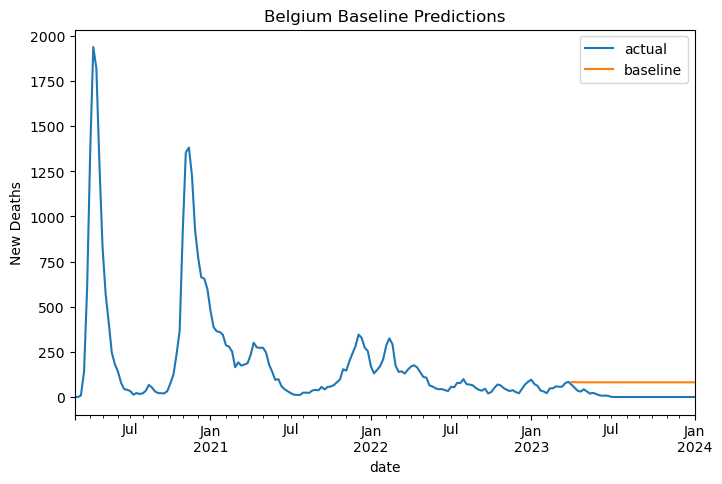

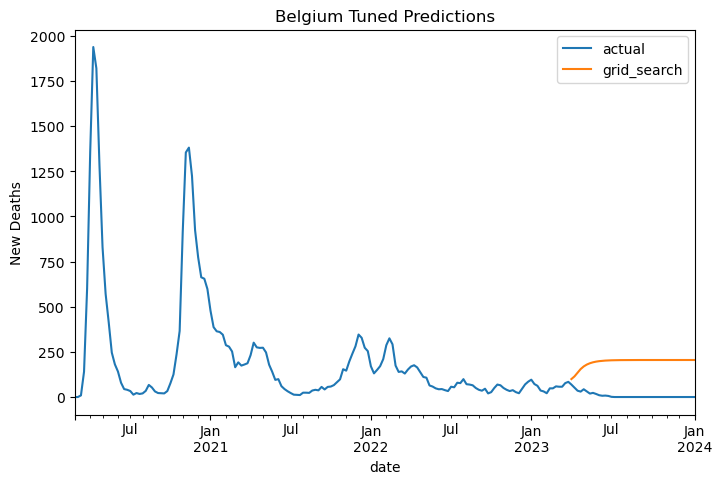

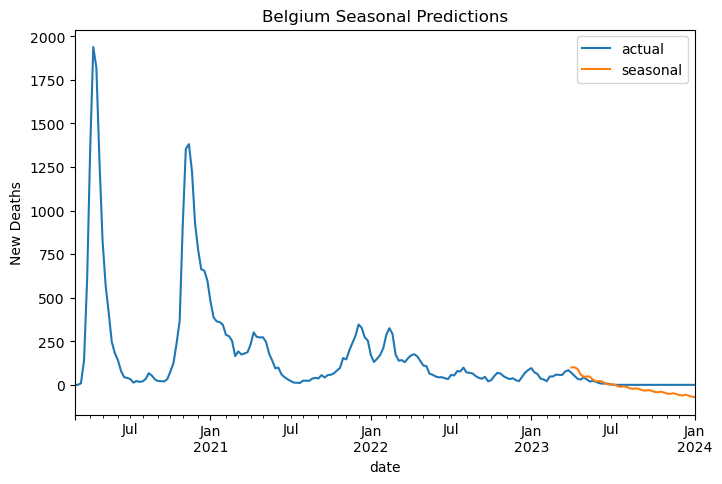

In [25]:
# train test split
train, test = belgium[0:train_size], belgium[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
belgium_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
belgium_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4))
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
belgium_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
belgium_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Belgium Baseline Predictions')
plt.ylabel('New Deaths')

belgium_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Belgium Tuned Predictions')
plt.ylabel('New Deaths')

belgium_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Belgium Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Belgium', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Belgium', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Belgium', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.29217D+00    |proj g|=  6.83940D-01

At iterate    5    f=  7.88608D+00    |proj g|=  2.22771D-02

At iterate   10    f=  7.87598D+00    |proj g|=  3.25936D-03

At iterate   15    f=  7.87585D+00    |proj g|=  6.15599D-04

At iterate   20    f=  7.87579D+00    |proj g|=  4.49810D-03

At iterate   25    f=  7.86454D+00    |proj g|=  3.87572D-02

At iterate   30    f=  7.85053D+00    |proj g|=  3.62271D-02


 This problem is unconstrained.



At iterate   35    f=  7.81955D+00    |proj g|=  4.71295D-03

At iterate   40    f=  7.81549D+00    |proj g|=  2.04087D-02

At iterate   45    f=  7.81392D+00    |proj g|=  1.83925D-02

At iterate   50    f=  7.80518D+00    |proj g|=  3.12379D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     65      1     0     0   3.124D-02   7.805D+00
  F =   7.8051822353306211     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  7.67157D+00    |proj g|=  2.28878D-03

At iterate   15    f=  7.67138D+00    |proj g|=  1.02837D-03

At iterate   20    f=  7.67128D+00    |proj g|=  6.62289D-04

At iterate   25    f=  7.67126D+00    |proj g|=  7.92731D-04

At iterate   30    f=  7.67105D+00    |proj g|=  5.18402D-03

At iterate   35    f=  7.65893D+00    |proj g|=  3.40034D-02

At iterate   40    f=  7.63577D+00    |proj g|=  5.93414D-02

At iterate   45    f=  7.62041D+00    |proj g|=  2.26616D-02

At iterate   50    f=  7.60739D+00    |proj g|=  2.17354D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62   

 This problem is unconstrained.



At iterate   10    f=  7.72368D+00    |proj g|=  5.15389D-03

At iterate   15    f=  7.72329D+00    |proj g|=  1.34512D-03

At iterate   20    f=  7.72323D+00    |proj g|=  1.49726D-03

At iterate   25    f=  7.71887D+00    |proj g|=  6.03285D-02

At iterate   30    f=  7.67102D+00    |proj g|=  2.30104D-02

At iterate   35    f=  7.66647D+00    |proj g|=  5.46630D-03

At iterate   40    f=  7.65602D+00    |proj g|=  6.64066D-03

At iterate   45    f=  7.65588D+00    |proj g|=  3.05822D-04

At iterate   50    f=  7.65585D+00    |proj g|=  4.25933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     63   

 This problem is unconstrained.



At iterate   15    f=  7.67133D+00    |proj g|=  7.66510D-04

At iterate   20    f=  7.67124D+00    |proj g|=  5.80536D-03

At iterate   25    f=  7.67120D+00    |proj g|=  2.99289D-04

At iterate   30    f=  7.67115D+00    |proj g|=  2.97150D-03

At iterate   35    f=  7.66927D+00    |proj g|=  2.24742D-02

At iterate   40    f=  7.61842D+00    |proj g|=  6.02091D-02

At iterate   45    f=  7.60948D+00    |proj g|=  3.03537D-02

At iterate   50    f=  7.60593D+00    |proj g|=  5.73713D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   5.737D-03   7.606D+00
  F =   7.60593047419

 This problem is unconstrained.



At iterate   10    f=  7.82968D+00    |proj g|=  4.70479D-03

At iterate   15    f=  7.82872D+00    |proj g|=  1.58639D-02

At iterate   20    f=  7.82805D+00    |proj g|=  5.82040D-04

At iterate   25    f=  7.82803D+00    |proj g|=  5.15535D-03

At iterate   30    f=  7.82516D+00    |proj g|=  6.83141D-02

At iterate   35    f=  7.76219D+00    |proj g|=  1.09475D-01

At iterate   40    f=  7.75448D+00    |proj g|=  4.94919D-03

At iterate   45    f=  7.75393D+00    |proj g|=  3.34628D-03

At iterate   50    f=  7.75366D+00    |proj g|=  9.53694D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     55   

 This problem is unconstrained.



At iterate   15    f=  7.62335D+00    |proj g|=  5.90770D-03

At iterate   20    f=  7.62325D+00    |proj g|=  2.99087D-04

At iterate   25    f=  7.62323D+00    |proj g|=  2.03744D-03

At iterate   30    f=  7.62270D+00    |proj g|=  1.46438D-02

At iterate   35    f=  7.62250D+00    |proj g|=  1.19015D-03

At iterate   40    f=  7.62047D+00    |proj g|=  3.47140D-02

At iterate   45    f=  7.56028D+00    |proj g|=  2.94345D-02

At iterate   50    f=  7.55562D+00    |proj g|=  2.67008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.670D-03   7.556D+00
  F =   7.55561707332

 This problem is unconstrained.



At iterate    5    f=  7.73179D+00    |proj g|=  1.83088D-02

At iterate   10    f=  7.72770D+00    |proj g|=  8.20991D-03

At iterate   15    f=  7.72668D+00    |proj g|=  1.19014D-02

At iterate   20    f=  7.72606D+00    |proj g|=  7.08774D-03

At iterate   25    f=  7.72602D+00    |proj g|=  3.08007D-04

At iterate   30    f=  7.72583D+00    |proj g|=  5.03166D-03

At iterate   35    f=  7.72119D+00    |proj g|=  2.58127D-02

At iterate   40    f=  7.69809D+00    |proj g|=  9.85173D-02

At iterate   45    f=  7.66891D+00    |proj g|=  1.55968D-02

At iterate   50    f=  7.66703D+00    |proj g|=  3.78699D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  7.62317D+00    |proj g|=  2.98757D-04

At iterate   25    f=  7.62312D+00    |proj g|=  2.53026D-03

At iterate   30    f=  7.62306D+00    |proj g|=  2.99559D-04

At iterate   35    f=  7.62265D+00    |proj g|=  8.00461D-03

At iterate   40    f=  7.58079D+00    |proj g|=  8.05078D-02

At iterate   45    f=  7.55930D+00    |proj g|=  2.10631D-02

At iterate   50    f=  7.55602D+00    |proj g|=  1.43909D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   1.439D-02   7.556D+00
  F =   7.5560198468445021     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  7.87549D+00    |proj g|=  1.85040D-03

At iterate   15    f=  7.87526D+00    |proj g|=  7.54195D-04

At iterate   20    f=  7.87524D+00    |proj g|=  3.16247D-04

At iterate   25    f=  7.87473D+00    |proj g|=  1.54422D-02

At iterate   30    f=  7.85920D+00    |proj g|=  7.04084D-02

At iterate   35    f=  7.83844D+00    |proj g|=  5.51086D-02

At iterate   40    f=  7.81586D+00    |proj g|=  9.18348D-03

At iterate   45    f=  7.81271D+00    |proj g|=  3.04046D-02

At iterate   50    f=  7.81105D+00    |proj g|=  4.20687D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59   

 This problem is unconstrained.



At iterate   15    f=  7.67085D+00    |proj g|=  2.11158D-03

At iterate   20    f=  7.67078D+00    |proj g|=  5.86110D-04

At iterate   25    f=  7.67076D+00    |proj g|=  1.98628D-03

At iterate   30    f=  7.66953D+00    |proj g|=  3.56424D-02

At iterate   35    f=  7.64126D+00    |proj g|=  1.96547D-01

At iterate   40    f=  7.61482D+00    |proj g|=  3.27373D-03

At iterate   45    f=  7.61352D+00    |proj g|=  4.32139D-02

At iterate   50    f=  7.60999D+00    |proj g|=  5.03307D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54      1     0     0   5.033D-02   7.610D+00
  F =   7.60998564940

 This problem is unconstrained.



At iterate   15    f=  7.67227D+00    |proj g|=  2.99730D-04

At iterate   20    f=  7.67223D+00    |proj g|=  2.39287D-03

At iterate   25    f=  7.67211D+00    |proj g|=  5.70369D-03

At iterate   30    f=  7.65651D+00    |proj g|=  8.10786D-02

At iterate   35    f=  7.60811D+00    |proj g|=  1.78089D-02

At iterate   40    f=  7.60676D+00    |proj g|=  5.64885D-03

At iterate   45    f=  7.60615D+00    |proj g|=  4.09029D-03

At iterate   50    f=  7.60606D+00    |proj g|=  1.55749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     51      1     0     0   1.557D-03   7.606D+00
  F =   7.60605890770

 This problem is unconstrained.



At iterate   15    f=  7.67085D+00    |proj g|=  3.03788D-03

At iterate   20    f=  7.67077D+00    |proj g|=  9.36739D-04

At iterate   25    f=  7.67069D+00    |proj g|=  4.75084D-04

At iterate   30    f=  7.67068D+00    |proj g|=  1.35905D-03

At iterate   35    f=  7.67007D+00    |proj g|=  2.04470D-02

At iterate   40    f=  7.65269D+00    |proj g|=  4.98404D-02

At iterate   45    f=  7.62913D+00    |proj g|=  6.63263D-02

At iterate   50    f=  7.62216D+00    |proj g|=  7.19097D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     60      1     0     0   7.191D-03   7.622D+00
  F =   7.62216453066

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.85293D+00    |proj g|=  7.21408D-02

At iterate    5    f=  7.83325D+00    |proj g|=  2.65890D-02

At iterate   10    f=  7.82896D+00    |proj g|=  1.69391D-02

At iterate   15    f=  7.82831D+00    |proj g|=  2.09570D-03

At iterate   20    f=  7.82763D+00    |proj g|=  2.56261D-02

At iterate   25    f=  7.82641D+00    |proj g|=  1.47735D-02

At iterate   30    f=  7.82573D+00    |proj g|=  4.81188D-03

At iterate   35    f=  7.82568D+00    |proj g|=  3.16321D-04

At iterate   40    f=  7.82556D+00    |proj g|=  1.08911D-02

At iterate   45    f=  7.82518D+00    |proj g|=  6.05721D-03

At iterate   50    f=  7.82158D+00    |proj g|=  4.29766D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  7.62354D+00    |proj g|=  1.78621D-03

At iterate   20    f=  7.62321D+00    |proj g|=  7.20458D-03

At iterate   25    f=  7.62250D+00    |proj g|=  1.34142D-02

At iterate   30    f=  7.62132D+00    |proj g|=  3.10923D-02

At iterate   35    f=  7.62104D+00    |proj g|=  1.66205D-02

At iterate   40    f=  7.62076D+00    |proj g|=  8.37984D-03

At iterate   45    f=  7.62071D+00    |proj g|=  1.99709D-03

At iterate   50    f=  7.62062D+00    |proj g|=  2.57692D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     65      1     0     0   2.577D-03   7.621D+00
  F =   7.62061552951

 This problem is unconstrained.



At iterate    5    f=  7.68031D+00    |proj g|=  2.24694D-02

At iterate   10    f=  7.67638D+00    |proj g|=  5.58834D-03

At iterate   15    f=  7.67581D+00    |proj g|=  7.98918D-03

At iterate   20    f=  7.67563D+00    |proj g|=  3.67241D-03

At iterate   25    f=  7.67446D+00    |proj g|=  2.06829D-02

At iterate   30    f=  7.67336D+00    |proj g|=  1.27410D-02

At iterate   35    f=  7.67299D+00    |proj g|=  1.46336D-02

At iterate   40    f=  7.67293D+00    |proj g|=  5.18470D-04

At iterate   45    f=  7.67292D+00    |proj g|=  4.99794D-04

At iterate   50    f=  7.67290D+00    |proj g|=  3.89662D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  7.62343D+00    |proj g|=  1.80907D-03

At iterate   20    f=  7.62334D+00    |proj g|=  4.20990D-03

At iterate   25    f=  7.62258D+00    |proj g|=  1.04397D-02

At iterate   30    f=  7.62174D+00    |proj g|=  1.43426D-02

At iterate   35    f=  7.62131D+00    |proj g|=  3.99687D-03

At iterate   40    f=  7.62097D+00    |proj g|=  9.57761D-03

At iterate   45    f=  7.62086D+00    |proj g|=  3.78439D-03

At iterate   50    f=  7.62076D+00    |proj g|=  1.72516D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   1.725D-02   7.621D+00
  F =   7.62076320951

 This problem is unconstrained.



At iterate   20    f=  7.62325D+00    |proj g|=  2.99087D-04

At iterate   25    f=  7.62323D+00    |proj g|=  2.03744D-03

At iterate   30    f=  7.62270D+00    |proj g|=  1.46438D-02

At iterate   35    f=  7.62250D+00    |proj g|=  1.19015D-03

At iterate   40    f=  7.62047D+00    |proj g|=  3.47140D-02

At iterate   45    f=  7.56028D+00    |proj g|=  2.94345D-02

At iterate   50    f=  7.55562D+00    |proj g|=  2.67008D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   2.670D-03   7.556D+00
  F =   7.5556170733227974     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


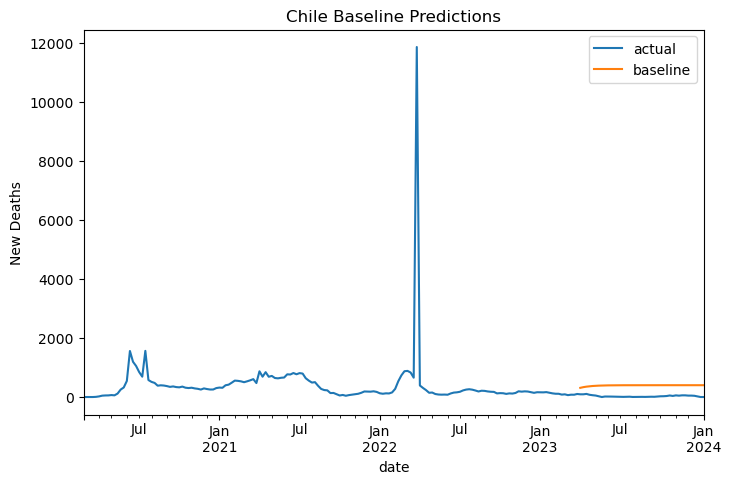

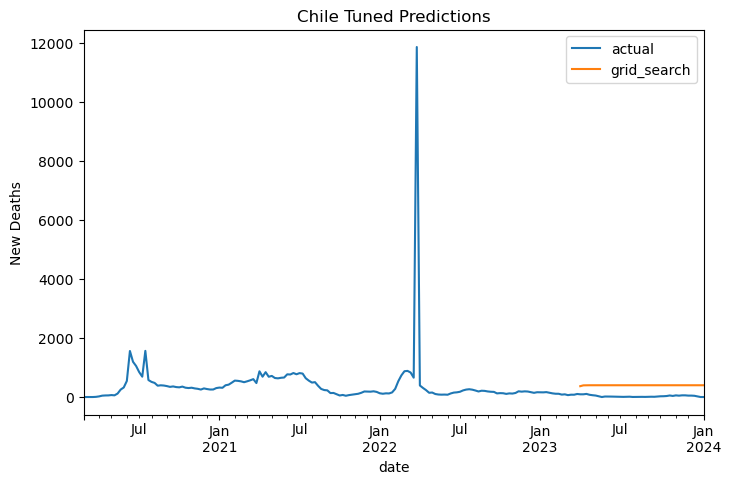

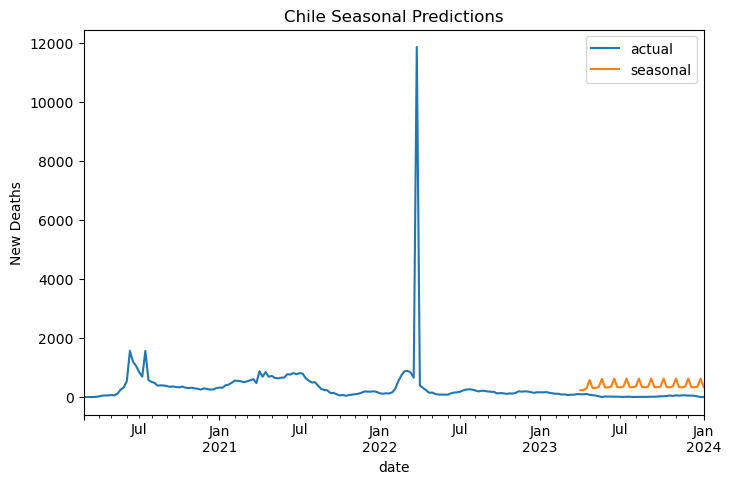

In [28]:
# train test split
train, test = chile[0:train_size], chile[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,0,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
chile_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
chile_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,0,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 0, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
chile_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
chile_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Chile Baseline Predictions')
plt.ylabel('New Deaths')

chile_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Chile Tuned Predictions')
plt.ylabel('New Deaths')

chile_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Chile Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Chile', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Chile', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Chile', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# Czechia

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.53322D+00    |proj g|=  1.16563D-01

At iterate    5    f=  5.46007D+00    |proj g|=  5.32285D-03

At iterate   10    f=  5.45575D+00    |proj g|=  1.43602D-02

At iterate   15    f=  5.31829D+00    |proj g|=  9.55549D-02

At iterate   20    f=  5.30903D+00    |proj g|=  9.99940D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     28      1     0     0   1.173D-05   5.309D+00
  F =   5.3090292654808664     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  5.32229D+00    |proj g|=  2.30010D-02

At iterate   10    f=  5.31764D+00    |proj g|=  1.23273D-02

At iterate   15    f=  5.29186D+00    |proj g|=  4.50874D-02

At iterate   20    f=  5.18532D+00    |proj g|=  8.34283D-02

At iterate   25    f=  5.17500D+00    |proj g|=  1.57485D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     34      1     0     0   5.668D-06   5.175D+00
  F =   5.1749976933995931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  5.20563D+00    |proj g|=  7.56711D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     28      1     0     0   2.794D-05   5.206D+00
  F =   5.2056243424826700     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.35962D+00    |proj g|=  3.40521D-01

At iterate    5    f=  5.31973D+00    |proj g|=  2.27767D-02

At iterate   10    f=  5.31664D+00    |proj g|=  1.89646D-02


 This problem is unconstrained.



At iterate   15    f=  5.30219D+00    |proj g|=  3.31412D-02

At iterate   20    f=  5.28992D+00    |proj g|=  4.15260D-02

At iterate   25    f=  5.17909D+00    |proj g|=  7.87447D-02

At iterate   30    f=  5.17220D+00    |proj g|=  2.17019D-03



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.
 This problem is unconstrained.



At iterate   35    f=  5.17212D+00    |proj g|=  9.48264D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     35     63      2     0     0   9.483D-06   5.172D+00
  F =   5.1721179968890496     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.51068D+00    |proj g|=  1.22458D-01

At iterate    5    f=  5.43447D+00    |proj g|=  4.85859D-03

At iterate   10    f=  5.43013D+00    |proj g|=  1.32346D-02

At iter

 This problem is unconstrained.



At iterate   20    f=  5.26336D+00    |proj g|=  4.89338D-02

At iterate   25    f=  5.18224D+00    |proj g|=  7.18044D-02

At iterate   30    f=  5.14939D+00    |proj g|=  2.62632D-02

At iterate   35    f=  5.14197D+00    |proj g|=  3.47451D-03

At iterate   40    f=  5.14190D+00    |proj g|=  1.43086D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   2.188D-06   5.142D+00
  F =   5.1419040567217493     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   20    f=  5.28656D+00    |proj g|=  8.31075D-02

At iterate   25    f=  5.25305D+00    |proj g|=  1.66393D-01

At iterate   30    f=  5.20845D+00    |proj g|=  4.27828D-02

At iterate   35    f=  5.20461D+00    |proj g|=  2.30857D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     49      1     0     0   2.744D-06   5.205D+00
  F =   5.2046098144039972     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.34035D+00    |proj g|=  3.63329D-01

At iterate    5    f=  5.29425D+00    |proj g|=  2.32581D-02

At iterate   10    f=  5.28837D+00    |proj g|=  2.32956D-02

At iterate   15    f=  5.27815D+00    |proj g|=  1.77626D-02

At iterate   20    f=  5.26575D+00    |proj g|=  1.25752D-02

At iterate   25    f=  5.19588D+00    |proj g|=  1.50226D-01

At iterate   30    f=  5.13820D+00    |proj g|=  1.38390D-02

At iterate   35    f=  5.13804D+00    |proj g|=  1.39391D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  5.40857D+00    |proj g|=  9.08109D-03

At iterate   15    f=  5.40246D+00    |proj g|=  8.86831D-02

At iterate   20    f=  5.39921D+00    |proj g|=  4.81261D-03

At iterate   25    f=  5.39421D+00    |proj g|=  1.26365D-02

At iterate   30    f=  5.38160D+00    |proj g|=  4.03636D-02

At iterate   35    f=  5.34269D+00    |proj g|=  6.13310D-02

At iterate   40    f=  5.31667D+00    |proj g|=  2.28634D-02

At iterate   45    f=  5.31063D+00    |proj g|=  3.87823D-02

At iterate   50    f=  5.30384D+00    |proj g|=  8.18247D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

 This problem is unconstrained.



At iterate   10    f=  5.26681D+00    |proj g|=  1.91149D-01

At iterate   15    f=  5.26031D+00    |proj g|=  1.33640D-02

At iterate   20    f=  5.25722D+00    |proj g|=  2.26369D-02

At iterate   25    f=  5.25623D+00    |proj g|=  3.82042D-02

At iterate   30    f=  5.24075D+00    |proj g|=  7.38270D-02

At iterate   35    f=  5.21659D+00    |proj g|=  5.51339D-02

At iterate   40    f=  5.18788D+00    |proj g|=  1.69845D-02

At iterate   45    f=  5.17869D+00    |proj g|=  3.98586D-02

At iterate   50    f=  5.17209D+00    |proj g|=  1.99794D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     63   

 This problem is unconstrained.



At iterate   20    f=  5.26696D+00    |proj g|=  2.15644D-02

At iterate   25    f=  5.26324D+00    |proj g|=  1.08725D-01

At iterate   30    f=  5.25641D+00    |proj g|=  4.61202D-03

At iterate   35    f=  5.25300D+00    |proj g|=  1.68614D-02

At iterate   40    f=  5.24952D+00    |proj g|=  3.34931D-02

At iterate   45    f=  5.20061D+00    |proj g|=  1.27946D-01

At iterate   50    f=  5.18008D+00    |proj g|=  4.92238D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   4.922D-02   5.180D+00
  F =   5.1800794975815920     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.36360D+00    |proj g|=  8.36603D-01

At iterate    5    f=  5.27563D+00    |proj g|=  8.23225D-02

At iterate   10    f=  5.26993D+00    |proj g|=  4.42491D-02

At iterate   15    f=  5.26757D+00    |proj g|=  7.53657D-03

At iterate   20    f=  5.26471D+00    |proj g|=  4.19717D-02

At iterate   25    f=  5.25978D+00    |proj g|=  1.86831D-02

At iterate   30    f=  5.25488D+00    |proj g|=  2.47244D-02

At iterate   35    f=  5.25194D+00    |proj g|=  1.49832D-02

At iterate   40    f=  5.24599D+00    |proj g|=  3.86762D-02

At iterate   45    f=  5.22830D+00    |proj g|=  4.19201D-02

At iterate   50    f=  5.17950D+00    |proj g|=  3.44164D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  5.38659D+00    |proj g|=  3.21951D-02

At iterate   10    f=  5.37840D+00    |proj g|=  1.06484D-02

At iterate   15    f=  5.35575D+00    |proj g|=  9.67764D-02

At iterate   20    f=  5.29705D+00    |proj g|=  1.01475D-01

At iterate   25    f=  5.28078D+00    |proj g|=  3.93383D-02

At iterate   30    f=  5.27768D+00    |proj g|=  2.41391D-02

At iterate   35    f=  5.27519D+00    |proj g|=  9.37658D-03

At iterate   40    f=  5.27488D+00    |proj g|=  1.95516D-03

At iterate   45    f=  5.27486D+00    |proj g|=  3.16893D-04

At iterate   50    f=  5.27485D+00    |proj g|=  4.53468D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.24451D+00    |proj g|=  2.13548D-02

At iterate   10    f=  5.23947D+00    |proj g|=  1.91437D-02

At iterate   15    f=  5.23853D+00    |proj g|=  9.28149D-03

At iterate   20    f=  5.23351D+00    |proj g|=  1.97661D-02

At iterate   25    f=  5.20635D+00    |proj g|=  7.62177D-02

At iterate   30    f=  5.16572D+00    |proj g|=  4.41028D-02

At iterate   35    f=  5.14320D+00    |proj g|=  1.76006D-02

At iterate   40    f=  5.14194D+00    |proj g|=  7.27254D-03

At iterate   45    f=  5.14176D+00    |proj g|=  1.97496D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     47     57   

 This problem is unconstrained.



At iterate   15    f=  5.27253D+00    |proj g|=  4.64805D-03

At iterate   20    f=  5.26976D+00    |proj g|=  2.82513D-02

At iterate   25    f=  5.25610D+00    |proj g|=  5.72309D-02

At iterate   30    f=  5.24304D+00    |proj g|=  4.47512D-02

At iterate   35    f=  5.20327D+00    |proj g|=  1.29690D-01

At iterate   40    f=  5.18782D+00    |proj g|=  8.09016D-03

At iterate   45    f=  5.18708D+00    |proj g|=  3.76470D-02

At iterate   50    f=  5.17531D+00    |proj g|=  4.00371D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     64      1     0     0   4.004D-02   5.175D+00
  F =   5.17531173852

 This problem is unconstrained.



At iterate   20    f=  5.22514D+00    |proj g|=  4.36001D-02

At iterate   25    f=  5.22205D+00    |proj g|=  7.07699D-03

At iterate   30    f=  5.19760D+00    |proj g|=  3.10847D-01

At iterate   35    f=  5.17330D+00    |proj g|=  4.67356D-02

At iterate   40    f=  5.15857D+00    |proj g|=  2.37606D-01

At iterate   45    f=  5.14452D+00    |proj g|=  7.57603D-02

At iterate   50    f=  5.13954D+00    |proj g|=  1.80050D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     60      1     0     0   1.801D-02   5.140D+00
  F =   5.1395395354693854     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  5.29778D+00    |proj g|=  1.20007D-02

At iterate   10    f=  5.29282D+00    |proj g|=  1.33221D-02

At iterate   15    f=  5.28400D+00    |proj g|=  2.47886D-02

At iterate   20    f=  5.26336D+00    |proj g|=  4.89338D-02

At iterate   25    f=  5.18224D+00    |proj g|=  7.18044D-02

At iterate   30    f=  5.14939D+00    |proj g|=  2.62632D-02

At iterate   35    f=  5.14197D+00    |proj g|=  3.47451D-03

At iterate   40    f=  5.14190D+00    |proj g|=  1.43086D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   2.188D-06   5.142D+00
  F =   5.14190405672

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


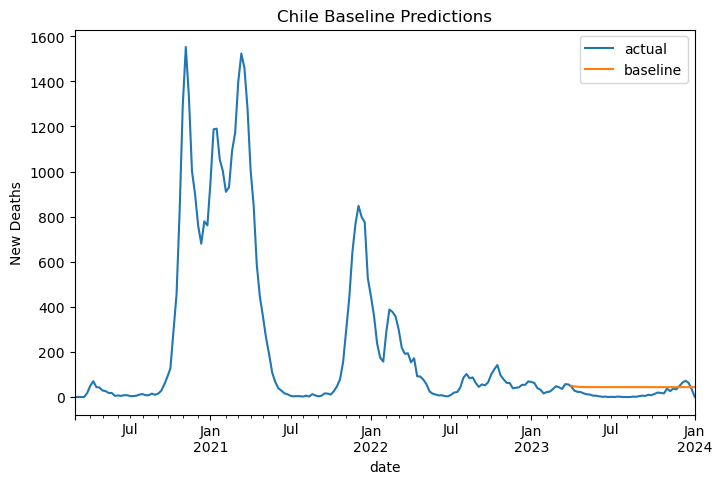

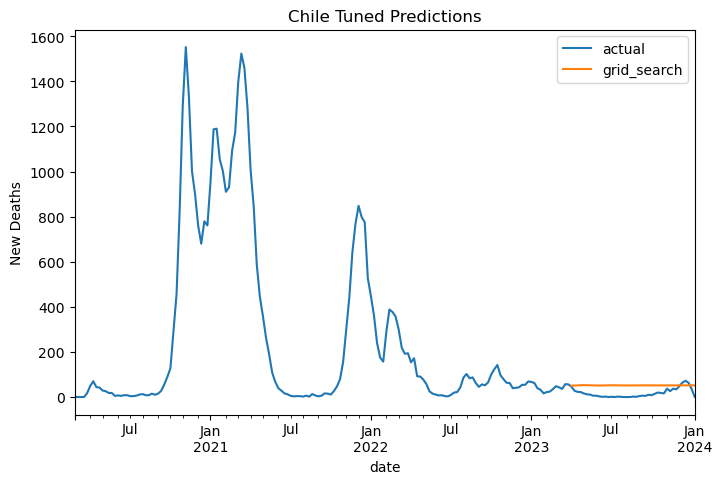

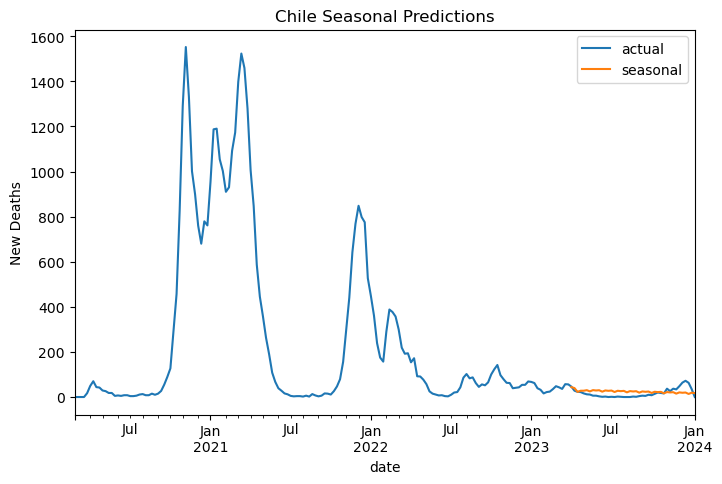

In [30]:
# train test split
train, test = czechia[0:train_size], czechia[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
czechia_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
czechia_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
czechia_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
czechia_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Czechia Baseline Predictions')
plt.ylabel('New Deaths')

czechia_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Czechia Tuned Predictions')
plt.ylabel('New Deaths')

czechia_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Czechia Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Czechia', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Czechia', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Czechia', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# Estonia

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.77321D+00    |proj g|=  5.71411D-02

At iterate    5    f=  3.72191D+00    |proj g|=  3.18446D-02

At iterate   10    f=  3.67908D+00    |proj g|=  8.27268D-02

At iterate   15    f=  3.67423D+00    |proj g|=  2.78525D-04

At iterate   20    f=  3.67421D+00    |proj g|=  4.55992D-03

At iterate   25    f=  3.67406D+00    |proj g|=  2.12342D-03

At iterate   30    f=  3.67403D+00    |proj g|=  2.72613D-04


 This problem is unconstrained.



At iterate   35    f=  3.67403D+00    |proj g|=  1.77343D-03

At iterate   40    f=  3.67402D+00    |proj g|=  5.75960D-04

At iterate   45    f=  3.67402D+00    |proj g|=  1.12268D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     47     54      1     0     0   1.539D-06   3.674D+00
  F =   3.6740238398480871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.62019D+00    |proj g|=  2.20506D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  3.55533D+00    |proj g|=  3.33098D-03

At iterate   20    f=  3.55520D+00    |proj g|=  7.37423D-03

At iterate   25    f=  3.55446D+00    |proj g|=  1.44768D-03

At iterate   30    f=  3.55437D+00    |proj g|=  1.42005D-03

At iterate   35    f=  3.55435D+00    |proj g|=  2.28912D-04

At iterate   40    f=  3.55435D+00    |proj g|=  2.26258D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     44     55      1     0     0   9.272D-05   3.554D+00
  F =   3.5543534535930825     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  3.56868D+00    |proj g|=  3.57367D-03

At iterate   25    f=  3.56856D+00    |proj g|=  9.69398D-04

At iterate   30    f=  3.56854D+00    |proj g|=  1.63344D-04

At iterate   35    f=  3.56854D+00    |proj g|=  1.42133D-04

At iterate   40    f=  3.56854D+00    |proj g|=  8.80310D-05

At iterate   45    f=  3.56854D+00    |proj g|=  2.88786D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     51      1     0     0   2.888D-05   3.569D+00
  F =   3.5685355753144306     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  3.54561D+00    |proj g|=  6.54683D-03

At iterate   25    f=  3.54485D+00    |proj g|=  9.69426D-03

At iterate   30    f=  3.54424D+00    |proj g|=  3.06760D-03

At iterate   35    f=  3.54417D+00    |proj g|=  1.62899D-04

At iterate   40    f=  3.54416D+00    |proj g|=  3.91527D-04

At iterate   45    f=  3.54416D+00    |proj g|=  4.01061D-04

At iterate   50    f=  3.54416D+00    |proj g|=  3.29516D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     61      1     0     0   3.295D-05   3.544D+00
  F =   3.5441586114439287     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   15    f=  3.62585D+00    |proj g|=  8.43206D-02

At iterate   20    f=  3.62393D+00    |proj g|=  1.48286D-04

At iterate   25    f=  3.62387D+00    |proj g|=  6.11104D-03

At iterate   30    f=  3.62372D+00    |proj g|=  1.03695D-03

At iterate   35    f=  3.62371D+00    |proj g|=  3.13036D-03

At iterate   40    f=  3.62370D+00    |proj g|=  1.19660D-03

At iterate   45    f=  3.62370D+00    |proj g|=  1.16646D-04

At iterate   50    f=  3.62370D+00    |proj g|=  1.43329D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     57      1     0     0   1.433D-04   3.624D+00
  F =   3.62369954541

 This problem is unconstrained.



At iterate   15    f=  3.52309D+00    |proj g|=  3.51556D-02

At iterate   20    f=  3.51448D+00    |proj g|=  7.92737D-03

At iterate   25    f=  3.51428D+00    |proj g|=  1.28743D-03

At iterate   30    f=  3.51335D+00    |proj g|=  1.07785D-02

At iterate   35    f=  3.51310D+00    |proj g|=  3.45598D-03

At iterate   40    f=  3.51302D+00    |proj g|=  7.39309D-04

At iterate   45    f=  3.51302D+00    |proj g|=  2.57155D-04

At iterate   50    f=  3.51302D+00    |proj g|=  4.68334D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   4.683D-05   3.513D+00
  F =   3.51301501150

 This problem is unconstrained.



At iterate   10    f=  3.57460D+00    |proj g|=  4.19929D-02

At iterate   15    f=  3.56527D+00    |proj g|=  2.02610D-02

At iterate   20    f=  3.55950D+00    |proj g|=  1.85686D-02

At iterate   25    f=  3.55906D+00    |proj g|=  2.88874D-04

At iterate   30    f=  3.55897D+00    |proj g|=  5.97823D-03

At iterate   35    f=  3.55873D+00    |proj g|=  8.74760D-04

At iterate   40    f=  3.55870D+00    |proj g|=  7.01605D-04

At iterate   45    f=  3.55870D+00    |proj g|=  1.82114D-04

At iterate   50    f=  3.55870D+00    |proj g|=  5.00301D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     54   

 This problem is unconstrained.



At iterate    5    f=  3.57902D+00    |proj g|=  4.22337D-02

At iterate   10    f=  3.55126D+00    |proj g|=  1.06504D-01

At iterate   15    f=  3.52556D+00    |proj g|=  3.79840D-02

At iterate   20    f=  3.52142D+00    |proj g|=  7.93808D-03

At iterate   25    f=  3.51654D+00    |proj g|=  2.54546D-02

At iterate   30    f=  3.51388D+00    |proj g|=  3.90421D-03

At iterate   35    f=  3.51369D+00    |proj g|=  3.64634D-03

At iterate   40    f=  3.51332D+00    |proj g|=  7.10435D-03

At iterate   45    f=  3.51262D+00    |proj g|=  2.91252D-03

At iterate   50    f=  3.51245D+00    |proj g|=  5.90856D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.74713D+00    |proj g|=  3.96928D-02

At iterate   10    f=  3.72678D+00    |proj g|=  1.76683D-01

At iterate   15    f=  3.69873D+00    |proj g|=  1.47704D-01

At iterate   20    f=  3.69173D+00    |proj g|=  4.55376D-03

At iterate   25    f=  3.69128D+00    |proj g|=  2.29982D-02

At iterate   30    f=  3.69116D+00    |proj g|=  1.51114D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     34     41      1     0     0   2.865D-05   3.691D+00
  F =   3.6911611487164873     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  3.58428D+00    |proj g|=  1.77717D-01

At iterate   25    f=  3.57185D+00    |proj g|=  1.53088D-02

At iterate   30    f=  3.56704D+00    |proj g|=  8.16005D-02

At iterate   35    f=  3.54606D+00    |proj g|=  6.18496D-02

At iterate   40    f=  3.54336D+00    |proj g|=  9.61251D-04

At iterate   45    f=  3.54321D+00    |proj g|=  8.09115D-03

At iterate   50    f=  3.54269D+00    |proj g|=  2.00680D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     64      1     0     0   2.007D-03   3.543D+00
  F =   3.5426888274263129     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.76281D+00    |proj g|=  1.48240D+00

At iterate    5    f=  3.64590D+00    |proj g|=  1.64484D-01

At iterate   10    f=  3.61542D+00    |proj g|=  4.27508D-01

At iterate   15    f=  3.58814D+00    |proj g|=  1.21747D-01

At iterate   20    f=  3.56241D+00    |proj g|=  2.02611D-02

At iterate   25    f=  3.56053D+00    |proj g|=  7.71663D-02

At iterate   30    f=  3.54735D+00    |proj g|=  9.70243D-02

At iterate   35    f=  3.54030D+00    |proj g|=  4.11321D-03

At iterate   40    f=  3.53997D+00    |proj g|=  3.66373D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.



At iterate   15    f=  3.58906D+00    |proj g|=  1.52696D-01

At iterate   20    f=  3.56175D+00    |proj g|=  3.89931D-02

At iterate   25    f=  3.55695D+00    |proj g|=  2.39853D-02

At iterate   30    f=  3.55197D+00    |proj g|=  1.44657D-01

At iterate   35    f=  3.54042D+00    |proj g|=  1.34869D-02

At iterate   40    f=  3.53976D+00    |proj g|=  8.61780D-03

At iterate   45    f=  3.53962D+00    |proj g|=  5.03973D-03

At iterate   50    f=  3.53932D+00    |proj g|=  3.72258D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   3.723D-03   3.539D+00
  F =   3.53932307511

 This problem is unconstrained.



At iterate    5    f=  3.70380D+00    |proj g|=  5.54072D-02

At iterate   10    f=  3.68262D+00    |proj g|=  3.00710D-02

At iterate   15    f=  3.66704D+00    |proj g|=  1.73987D-02

At iterate   20    f=  3.66636D+00    |proj g|=  2.01252D-02

At iterate   25    f=  3.66620D+00    |proj g|=  6.85041D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     25     31      1     0     0   6.850D-05   3.666D+00
  F =   3.6661970677895912     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   25    f=  3.51241D+00    |proj g|=  1.93881D-03

At iterate   30    f=  3.51185D+00    |proj g|=  1.22616D-02

At iterate   35    f=  3.51123D+00    |proj g|=  1.07975D-02

At iterate   40    f=  3.51094D+00    |proj g|=  2.58714D-03

At iterate   45    f=  3.51084D+00    |proj g|=  1.45969D-03

At iterate   50    f=  3.51082D+00    |proj g|=  3.67481D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     53      1     0     0   3.675D-04   3.511D+00
  F =   3.5108177593334045     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  3.53589D+00    |proj g|=  1.51761D-02

At iterate   20    f=  3.53541D+00    |proj g|=  9.15903D-03

At iterate   25    f=  3.53499D+00    |proj g|=  9.64542D-04

At iterate   30    f=  3.53499D+00    |proj g|=  4.67472D-04

At iterate   35    f=  3.53495D+00    |proj g|=  4.23924D-03

At iterate   40    f=  3.53484D+00    |proj g|=  1.40055D-03

At iterate   45    f=  3.53483D+00    |proj g|=  3.96643D-04

At iterate   50    f=  3.53482D+00    |proj g|=  1.69478D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   1.695D-04   3.535D+00
  F =   3.53482434298

 This problem is unconstrained.



At iterate    5    f=  3.56761D+00    |proj g|=  4.61077D-02

At iterate   10    f=  3.54833D+00    |proj g|=  2.61392D-02

At iterate   15    f=  3.53013D+00    |proj g|=  2.26261D-02

At iterate   20    f=  3.51671D+00    |proj g|=  5.01554D-02

At iterate   25    f=  3.51361D+00    |proj g|=  9.37878D-03

At iterate   30    f=  3.51256D+00    |proj g|=  3.46787D-03

At iterate   35    f=  3.51231D+00    |proj g|=  2.96059D-02

At iterate   40    f=  3.51098D+00    |proj g|=  3.16505D-03

At iterate   45    f=  3.51079D+00    |proj g|=  4.33436D-03

At iterate   50    f=  3.51075D+00    |proj g|=  1.95128D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  3.52309D+00    |proj g|=  3.51556D-02

At iterate   20    f=  3.51448D+00    |proj g|=  7.92737D-03

At iterate   25    f=  3.51428D+00    |proj g|=  1.28743D-03

At iterate   30    f=  3.51335D+00    |proj g|=  1.07785D-02

At iterate   35    f=  3.51310D+00    |proj g|=  3.45598D-03

At iterate   40    f=  3.51302D+00    |proj g|=  7.39309D-04

At iterate   45    f=  3.51302D+00    |proj g|=  2.57155D-04

At iterate   50    f=  3.51302D+00    |proj g|=  4.68334D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   4.683D-05   3.513D+00
  F =   3.51301501150

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


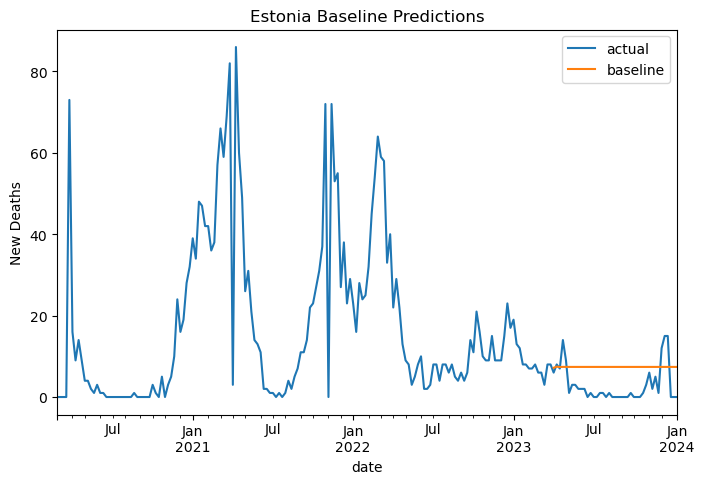

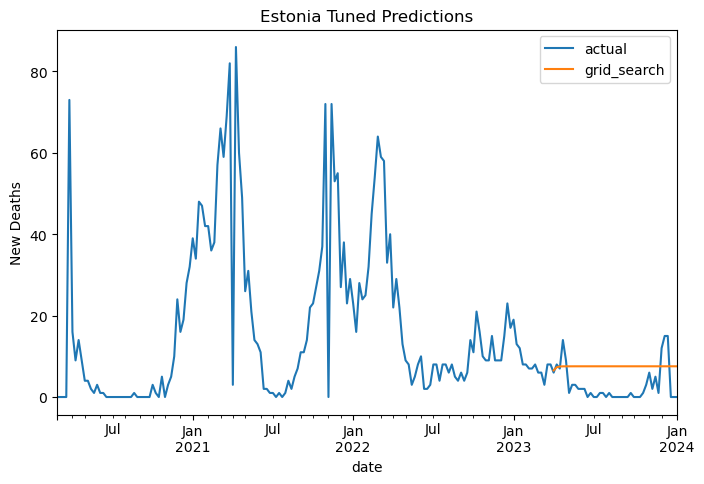

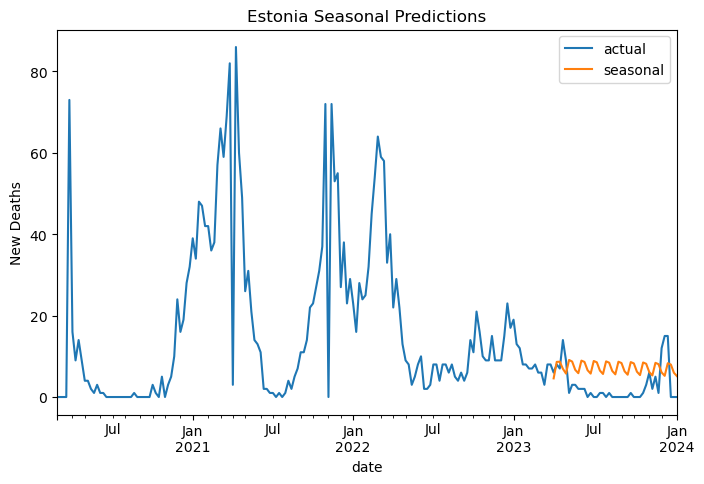

In [31]:
# train test split
train, test = estonia[0:train_size], estonia[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
estonia_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
estonia_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
estonia_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
estonia_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Estonia Baseline Predictions')
plt.ylabel('New Deaths')

estonia_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Estonia Tuned Predictions')
plt.ylabel('New Deaths')

estonia_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Estonia Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Estonia', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Estonia', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Estonia', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# France

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.43889D+00    |proj g|=  8.81080D-02

At iterate    5    f=  6.37386D+00    |proj g|=  1.77940D-02

At iterate   10    f=  6.37015D+00    |proj g|=  2.12352D-03

At iterate   15    f=  6.23997D+00    |proj g|=  1.99036D-01

At iterate   20    f=  6.21662D+00    |proj g|=  6.27883D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     23     29      1     0     0   1.358D-06   6.217D+00
  F =   6.2166240269292059     

CONVERG

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  6.20064D+00    |proj g|=  6.40464D-03

At iterate   10    f=  6.20012D+00    |proj g|=  1.03875D-02

At iterate   15    f=  6.18813D+00    |proj g|=  8.13192D-02

At iterate   20    f=  6.04059D+00    |proj g|=  1.27229D-01

At iterate   25    f=  6.03122D+00    |proj g|=  8.33588D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   2.458D-06   6.031D+00
  F =   6.0312141390877363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   20    f=  6.10492D+00    |proj g|=  2.12751D-01

At iterate   25    f=  6.08834D+00    |proj g|=  3.50816D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     32      1     0     0   2.103D-05   6.088D+00
  F =   6.0883424649173294     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.23065D+00    |proj g|=  1.78107D-01

At iterate    5    f=  6.19512D+00    |proj g|=  3.36719D-02


 This problem is unconstrained.



At iterate   10    f=  6.19441D+00    |proj g|=  4.76059D-03

At iterate   15    f=  6.19316D+00    |proj g|=  3.08163D-03

At iterate   20    f=  6.19241D+00    |proj g|=  1.19951D-02

At iterate   25    f=  6.12769D+00    |proj g|=  5.39104D-01

At iterate   30    f=  6.01815D+00    |proj g|=  4.96416D-02

At iterate   35    f=  6.01719D+00    |proj g|=  2.46670D-02

At iterate   40    f=  6.01677D+00    |proj g|=  4.40294D-03

At iterate   45    f=  6.01675D+00    |proj g|=  9.49781D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     51      1     0     0   2.624D-04   6.017D+00
  F =   6.01675461047

 This problem is unconstrained.



At iterate   10    f=  6.29160D+00    |proj g|=  1.93850D-03

At iterate   15    f=  6.17640D+00    |proj g|=  3.99394D-02

At iterate   20    f=  6.15582D+00    |proj g|=  8.09307D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     22     30      1     0     0   8.161D-06   6.156D+00
  F =   6.1558223525409366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.12814D+00    |proj g|=  8.87817D-02


 This problem is unconstrained.



At iterate    5    f=  6.11260D+00    |proj g|=  5.53167D-03

At iterate   10    f=  6.11222D+00    |proj g|=  7.58236D-03

At iterate   15    f=  6.10968D+00    |proj g|=  2.74506D-03

At iterate   20    f=  6.10850D+00    |proj g|=  5.55317D-03

At iterate   25    f=  6.06190D+00    |proj g|=  4.76032D-02

At iterate   30    f=  5.97740D+00    |proj g|=  1.22365D-01

At iterate   35    f=  5.96481D+00    |proj g|=  3.03869D-03

At iterate   40    f=  5.96479D+00    |proj g|=  8.77356D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     48      1     0     0   2.522D-06   5.965D+00
  F =   5.96478556286

 This problem is unconstrained.



At iterate   20    f=  6.17219D+00    |proj g|=  3.19057D-02

At iterate   25    f=  6.06608D+00    |proj g|=  8.54934D-02

At iterate   30    f=  6.04685D+00    |proj g|=  3.82131D-03

At iterate   35    f=  6.04683D+00    |proj g|=  2.78922D-04

At iterate   40    f=  6.04622D+00    |proj g|=  1.42410D-02

At iterate   45    f=  6.04576D+00    |proj g|=  1.27109D-03

At iterate   50    f=  6.04576D+00    |proj g|=  6.86073D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     66      1     0     0   6.861D-06   6.046D+00
  F =   6.0457578938026693     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   20    f=  6.10516D+00    |proj g|=  2.61876D-02

At iterate   25    f=  6.09774D+00    |proj g|=  2.17971D-01

At iterate   30    f=  5.96241D+00    |proj g|=  9.99828D-02

At iterate   35    f=  5.94222D+00    |proj g|=  6.73119D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     38     47      1     0     0   8.699D-05   5.942D+00
  F =   5.9422125175152516     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   30    f=  6.25941D+00    |proj g|=  1.14994D-01

At iterate   35    f=  6.21123D+00    |proj g|=  3.64258D-02

At iterate   40    f=  6.20770D+00    |proj g|=  1.62055D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     43     51      1     0     0   1.091D-05   6.208D+00
  F =   6.2076970884658316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.13964D+00    |proj g|=  6.97013D-01


 This problem is unconstrained.



At iterate    5    f=  6.09543D+00    |proj g|=  1.83797D-02

At iterate   10    f=  6.08883D+00    |proj g|=  9.92934D-03

At iterate   15    f=  6.08786D+00    |proj g|=  1.14883D-02

At iterate   20    f=  6.08694D+00    |proj g|=  1.07222D-02

At iterate   25    f=  6.08506D+00    |proj g|=  6.69969D-03

At iterate   30    f=  6.08481D+00    |proj g|=  5.59730D-03

At iterate   35    f=  6.06160D+00    |proj g|=  3.01386D-01

At iterate   40    f=  6.00423D+00    |proj g|=  4.04263D-02

At iterate   45    f=  6.00225D+00    |proj g|=  4.00839D-03

At iterate   50    f=  6.00209D+00    |proj g|=  8.43750D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.22816D+00    |proj g|=  9.00139D-01

At iterate    5    f=  6.16279D+00    |proj g|=  4.35639D-02

At iterate   10    f=  6.15143D+00    |proj g|=  3.65480D-01

At iterate   15    f=  6.10548D+00    |proj g|=  1.09921D-01

At iterate   20    f=  6.09150D+00    |proj g|=  1.77419D-02

At iterate   25    f=  6.09015D+00    |proj g|=  1.69607D-02

At iterate   30    f=  6.08996D+00    |proj g|=  2.06110D-02

At iterate   35    f=  6.07513D+00    |proj g|=  1.48336D-01

At iterate   40    f=  6.02621D+00    |proj g|=  3.27946D-02

At iterate   45    f=  6.02063D+00    |proj g|=  5.45129D-03

At iterate   50    f=  6.02060D+00    |proj g|=  2.34247D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   20    f=  6.08617D+00    |proj g|=  1.15988D-02

At iterate   25    f=  6.08547D+00    |proj g|=  2.88664D-02

At iterate   30    f=  6.08520D+00    |proj g|=  1.74830D-03

At iterate   35    f=  6.08481D+00    |proj g|=  1.82323D-02

At iterate   40    f=  6.08203D+00    |proj g|=  1.45481D-02

At iterate   45    f=  6.07786D+00    |proj g|=  2.20122D-01

At iterate   50    f=  6.04166D+00    |proj g|=  3.41364D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   3.414D-01   6.042D+00
  F =   6.0416581895788575     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   25    f=  6.20449D+00    |proj g|=  2.46100D-02

At iterate   30    f=  6.20252D+00    |proj g|=  7.40870D-03

At iterate   35    f=  6.20235D+00    |proj g|=  1.96438D-03

At iterate   40    f=  6.19836D+00    |proj g|=  5.59963D-02

At iterate   45    f=  6.15611D+00    |proj g|=  1.34673D-02

At iterate   50    f=  6.15567D+00    |proj g|=  4.12733D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     60      1     0     0   4.127D-04   6.156D+00
  F =   6.1556683063982671     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  6.01190D+00    |proj g|=  2.56565D-02

At iterate   25    f=  6.01084D+00    |proj g|=  1.90369D-03

At iterate   30    f=  6.01053D+00    |proj g|=  1.38665D-02

At iterate   35    f=  6.00002D+00    |proj g|=  2.53752D-02

At iterate   40    f=  5.95537D+00    |proj g|=  1.66875D-01

At iterate   45    f=  5.93616D+00    |proj g|=  1.12146D-02

At iterate   50    f=  5.93571D+00    |proj g|=  1.60551D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   1.606D-02   5.936D+00
  F =   5.9357061714701995     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  6.08345D+00    |proj g|=  8.33564D-02

At iterate   15    f=  6.06608D+00    |proj g|=  3.20221D-02

At iterate   20    f=  6.06503D+00    |proj g|=  1.57395D-03

At iterate   25    f=  6.06127D+00    |proj g|=  9.96751D-03

At iterate   30    f=  6.05293D+00    |proj g|=  1.04551D-01

At iterate   35    f=  6.01609D+00    |proj g|=  3.14605D-02

At iterate   40    f=  6.00932D+00    |proj g|=  3.05198D-02

At iterate   45    f=  6.00746D+00    |proj g|=  2.47082D-03

At iterate   50    f=  6.00743D+00    |proj g|=  7.98903D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     62   

 This problem is unconstrained.



At iterate   15    f=  6.01326D+00    |proj g|=  8.49823D-03

At iterate   20    f=  6.01167D+00    |proj g|=  9.08323D-03

At iterate   25    f=  6.01136D+00    |proj g|=  1.00427D-02

At iterate   30    f=  6.01100D+00    |proj g|=  1.75651D-03

At iterate   35    f=  6.01057D+00    |proj g|=  1.01256D-02

At iterate   40    f=  6.00502D+00    |proj g|=  1.12911D-01

At iterate   45    f=  5.95778D+00    |proj g|=  9.93890D-02

At iterate   50    f=  5.93608D+00    |proj g|=  1.23419D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     59      1     0     0   1.234D-02   5.936D+00
  F =   5.93607512845

 This problem is unconstrained.



At iterate   15    f=  6.01391D+00    |proj g|=  2.63349D-02

At iterate   20    f=  6.01190D+00    |proj g|=  2.56565D-02

At iterate   25    f=  6.01084D+00    |proj g|=  1.90369D-03

At iterate   30    f=  6.01053D+00    |proj g|=  1.38665D-02

At iterate   35    f=  6.00002D+00    |proj g|=  2.53752D-02

At iterate   40    f=  5.95537D+00    |proj g|=  1.66875D-01

At iterate   45    f=  5.93616D+00    |proj g|=  1.12146D-02

At iterate   50    f=  5.93571D+00    |proj g|=  1.60551D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   1.606D-02   5.936D+00
  F =   5.93570617147

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


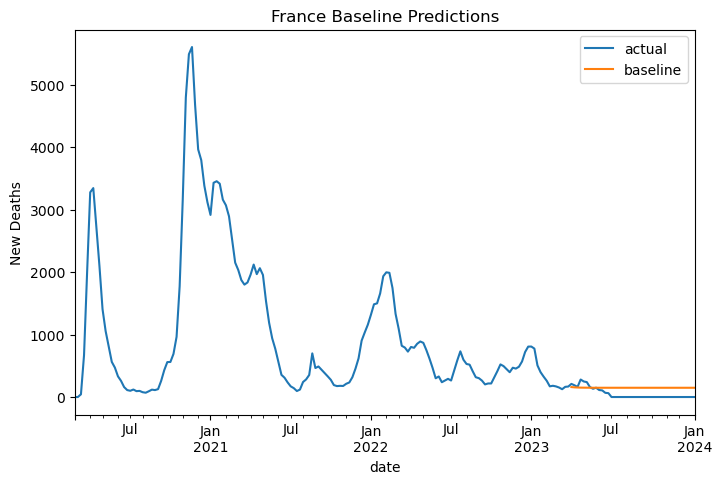

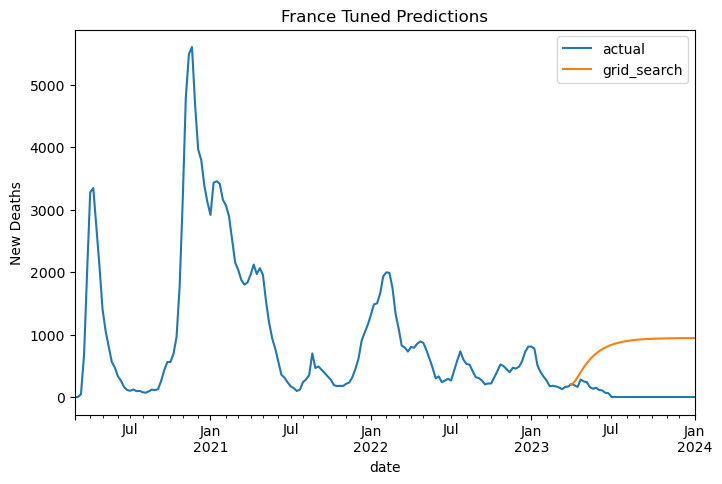

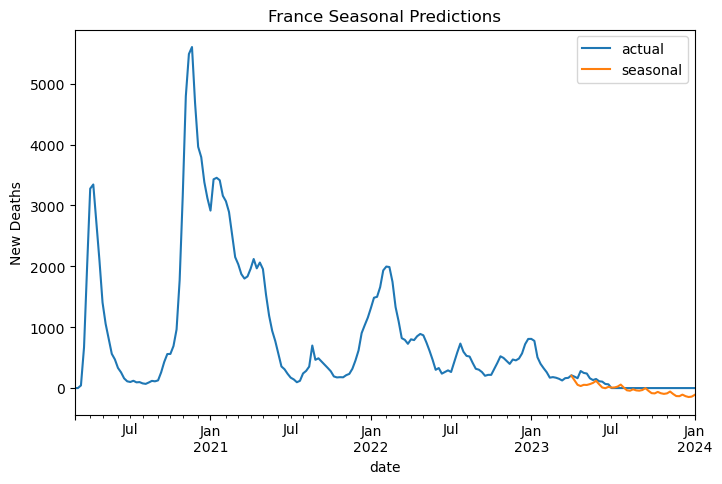

In [32]:
# train test split
train, test = france[0:train_size], france[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
france_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
france_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
france_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
france_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('France Baseline Predictions')
plt.ylabel('New Deaths')

france_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('France Tuned Predictions')
plt.ylabel('New Deaths')

france_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('France Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'France', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'France', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'France', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# Ireland

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.95373D+00    |proj g|=  1.28571D+00

At iterate    5    f=  4.57240D+00    |proj g|=  1.22545D-01

At iterate   10    f=  4.51505D+00    |proj g|=  4.17778D-02

At iterate   15    f=  4.47842D+00    |proj g|=  2.68018D-02

At iterate   20    f=  4.30409D+00    |proj g|=  4.30460D-02

At iterate   25    f=  4.30404D+00    |proj g|=  2.18687D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     25     39      1     0     0   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.44461D+00    |proj g|=  1.12296D-01

At iterate    5    f=  4.39243D+00    |proj g|=  1.47058D-02

At iterate   10    f=  4.35651D+00    |proj g|=  1.31010D-01

At iterate   15    f=  4.19083D+00    |proj g|=  2.04803D-02

At iterate   20    f=  4.16117D+00    |proj g|=  4.00497D-02

At iterate   25    f=  4.16015D+00    |proj g|=  1.53284D-03

At iterate   30    f=  4.15947D+00    |proj g|=  1.64329D-02

At iterate   35    f=  4.15806D+00    |proj g|=  3.26864D-03

At iterate   40    f=  4.15788D+00    |proj g|=  8.19935D-04

At iterate   45    f=  4.15787D+00    |proj g|=  1.57730D-03

At iterate   50    f=  4.15786D+00    |proj g|=  1.04686D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   15    f=  4.40043D+00    |proj g|=  6.62831D-02

At iterate   20    f=  4.25941D+00    |proj g|=  2.06143D-01

At iterate   25    f=  4.17846D+00    |proj g|=  2.50922D-02

At iterate   30    f=  4.17816D+00    |proj g|=  2.28752D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     31     37      1     0     0   2.884D-05   4.178D+00
  F =   4.1781616669531649     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.39144D+00    |proj g|=  5.12035D-02

At iterate   10    f=  4.37776D+00    |proj g|=  3.09989D-02

At iterate   15    f=  4.28542D+00    |proj g|=  2.20776D-01

At iterate   20    f=  4.19173D+00    |proj g|=  7.47795D-02

At iterate   25    f=  4.19066D+00    |proj g|=  1.17300D-02

At iterate   30    f=  4.18640D+00    |proj g|=  3.40286D-02

At iterate   35    f=  4.18561D+00    |proj g|=  1.82325D-02

At iterate   40    f=  4.18549D+00    |proj g|=  2.68571D-03

At iterate   45    f=  4.18547D+00    |proj g|=  4.41005D-04

At iterate   50    f=  4.18547D+00    |proj g|=  2.36461D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   20    f=  4.23877D+00    |proj g|=  4.24350D-02

At iterate   25    f=  4.23814D+00    |proj g|=  1.61477D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     27     38      1     0     0   3.283D-06   4.238D+00
  F =   4.2381396942653264     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.37115D+00    |proj g|=  2.42561D-01

At iterate    5    f=  4.26318D+00    |proj g|=  3.37831D-02


 This problem is unconstrained.



At iterate   10    f=  4.19474D+00    |proj g|=  2.57860D-01

At iterate   15    f=  4.09035D+00    |proj g|=  1.20741D-02

At iterate   20    f=  4.08994D+00    |proj g|=  4.83958D-02

At iterate   25    f=  4.08597D+00    |proj g|=  1.29875D-02

At iterate   30    f=  4.08572D+00    |proj g|=  9.97785D-03

At iterate   35    f=  4.08561D+00    |proj g|=  1.91242D-03

At iterate   40    f=  4.08559D+00    |proj g|=  3.64899D-04

At iterate   45    f=  4.08559D+00    |proj g|=  7.12673D-04

At iterate   50    f=  4.08559D+00    |proj g|=  4.60111D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate   30    f=  4.14055D+00    |proj g|=  4.27616D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     38      1     0     0   5.356D-06   4.141D+00
  F =   4.1405412279638893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.36374D+00    |proj g|=  2.74435D-01

At iterate    5    f=  4.26273D+00    |proj g|=  4.44842D-02


 This problem is unconstrained.



At iterate   10    f=  4.19463D+00    |proj g|=  2.10388D-01

At iterate   15    f=  4.08475D+00    |proj g|=  6.22213D-02

At iterate   20    f=  4.08193D+00    |proj g|=  1.32370D-02

At iterate   25    f=  4.07912D+00    |proj g|=  1.44803D-02

At iterate   30    f=  4.07853D+00    |proj g|=  1.03742D-02

At iterate   35    f=  4.07840D+00    |proj g|=  3.57440D-03

At iterate   40    f=  4.07837D+00    |proj g|=  4.04431D-03

At iterate   45    f=  4.07836D+00    |proj g|=  1.77328D-04

At iterate   50    f=  4.07836D+00    |proj g|=  1.10176D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59   

 This problem is unconstrained.



At iterate   20    f=  4.29082D+00    |proj g|=  1.80626D-02

At iterate   25    f=  4.28239D+00    |proj g|=  1.07112D-01

At iterate   30    f=  4.22129D+00    |proj g|=  1.88126D-02

At iterate   35    f=  4.21978D+00    |proj g|=  6.48580D-03

At iterate   40    f=  4.21973D+00    |proj g|=  1.76108D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     57      1     0     0   5.400D-05   4.220D+00
  F =   4.2197293407728242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.19731D+00    |proj g|=  1.27488D-01

At iterate   10    f=  4.19141D+00    |proj g|=  2.59730D-02

At iterate   15    f=  4.15754D+00    |proj g|=  1.07838D-01

At iterate   20    f=  4.13897D+00    |proj g|=  1.85995D-02

At iterate   25    f=  4.13741D+00    |proj g|=  7.10494D-03

At iterate   30    f=  4.13739D+00    |proj g|=  1.80272D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     34     41      1     0     0   4.285D-05   4.137D+00
  F =   4.1373856921692447     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.19312D+00    |proj g|=  4.00473D-01

At iterate   20    f=  4.16528D+00    |proj g|=  1.61486D-01

At iterate   25    f=  4.15009D+00    |proj g|=  6.96264D-02

At iterate   30    f=  4.10044D+00    |proj g|=  1.10073D-01

At iterate   35    f=  4.09005D+00    |proj g|=  1.42499D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     50      1     0     0   1.155D-05   4.090D+00
  F =   4.0900493211296585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   15    f=  4.14701D+00    |proj g|=  2.27858D-01

At iterate   20    f=  4.13631D+00    |proj g|=  3.73644D-02

At iterate   25    f=  4.10304D+00    |proj g|=  1.44327D-01

At iterate   30    f=  4.09209D+00    |proj g|=  5.55298D-02

At iterate   35    f=  4.08370D+00    |proj g|=  2.23091D-02

At iterate   40    f=  4.08364D+00    |proj g|=  3.81143D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     41     47      1     0     0   1.366D-05   4.084D+00
  F =   4.0836437871227602     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.28216D+00    |proj g|=  1.15419D-01

At iterate   20    f=  4.27096D+00    |proj g|=  6.54495D-02

At iterate   25    f=  4.26934D+00    |proj g|=  2.81017D-02

At iterate   30    f=  4.26059D+00    |proj g|=  4.76132D-01

At iterate   35    f=  4.23872D+00    |proj g|=  8.87696D-02

At iterate   40    f=  4.23732D+00    |proj g|=  7.20511D-03

At iterate   45    f=  4.22934D+00    |proj g|=  1.43741D+00

At iterate   50    f=  4.21391D+00    |proj g|=  4.06450D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     71      1     0     0   4.064D-02   4.214D+00
  F =   4.21390804967

 This problem is unconstrained.



At iterate   15    f=  4.06848D+00    |proj g|=  5.17890D-02

At iterate   20    f=  4.03726D+00    |proj g|=  5.34742D-02

At iterate   25    f=  4.02954D+00    |proj g|=  2.71082D-02

At iterate   30    f=  4.02795D+00    |proj g|=  1.50587D-04

At iterate   35    f=  4.02795D+00    |proj g|=  6.44264D-03

At iterate   40    f=  4.02781D+00    |proj g|=  3.60069D-03

At iterate   45    f=  4.02776D+00    |proj g|=  1.19189D-03

At iterate   50    f=  4.02775D+00    |proj g|=  1.56056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   1.561D-03   4.028D+00
  F =   4.02774749219

 This problem is unconstrained.



At iterate   15    f=  4.23073D+00    |proj g|=  3.51570D-01

At iterate   20    f=  4.20710D+00    |proj g|=  4.14212D-01

At iterate   25    f=  4.19244D+00    |proj g|=  1.75683D-01

At iterate   30    f=  4.17790D+00    |proj g|=  5.15365D-02

At iterate   35    f=  4.16060D+00    |proj g|=  5.10862D-01

At iterate   40    f=  4.14504D+00    |proj g|=  5.64909D-02

At iterate   45    f=  4.14449D+00    |proj g|=  2.68213D-01

At iterate   50    f=  4.14317D+00    |proj g|=  1.14315D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     59      1     0     0   1.143D-01   4.143D+00
  F =   4.14316538145

 This problem is unconstrained.



At iterate   20    f=  4.08499D+00    |proj g|=  3.08058D-02

At iterate   25    f=  4.05113D+00    |proj g|=  5.18696D-02

At iterate   30    f=  4.04529D+00    |proj g|=  3.13497D-02

At iterate   35    f=  4.03915D+00    |proj g|=  5.63273D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     37     45      1     0     0   2.663D-05   4.039D+00
  F =   4.0391499733014902     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  4.06848D+00    |proj g|=  5.17890D-02

At iterate   20    f=  4.03726D+00    |proj g|=  5.34742D-02

At iterate   25    f=  4.02954D+00    |proj g|=  2.71082D-02

At iterate   30    f=  4.02795D+00    |proj g|=  1.50587D-04

At iterate   35    f=  4.02795D+00    |proj g|=  6.44264D-03

At iterate   40    f=  4.02781D+00    |proj g|=  3.60069D-03

At iterate   45    f=  4.02776D+00    |proj g|=  1.19189D-03

At iterate   50    f=  4.02775D+00    |proj g|=  1.56056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     61      1     0     0   1.561D-03   4.028D+00
  F =   4.02774749219

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


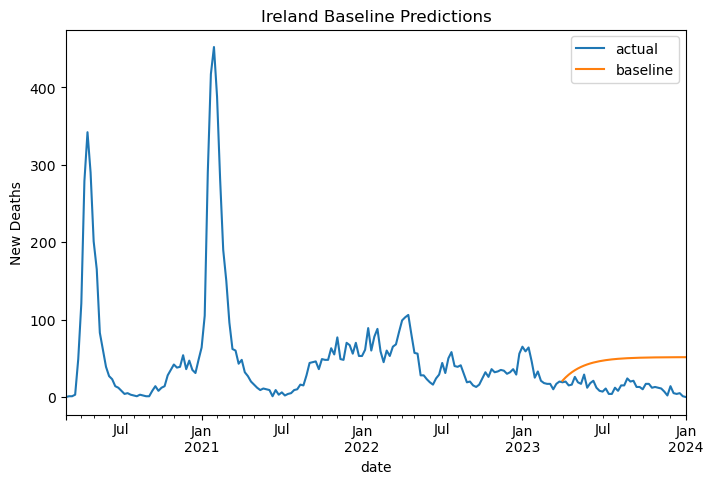

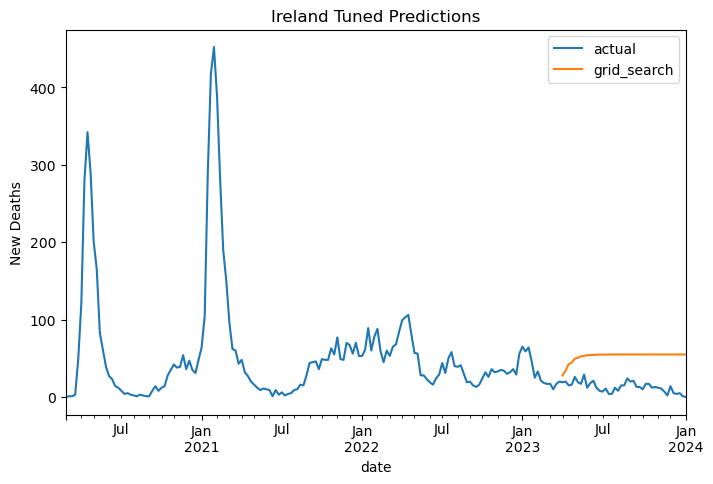

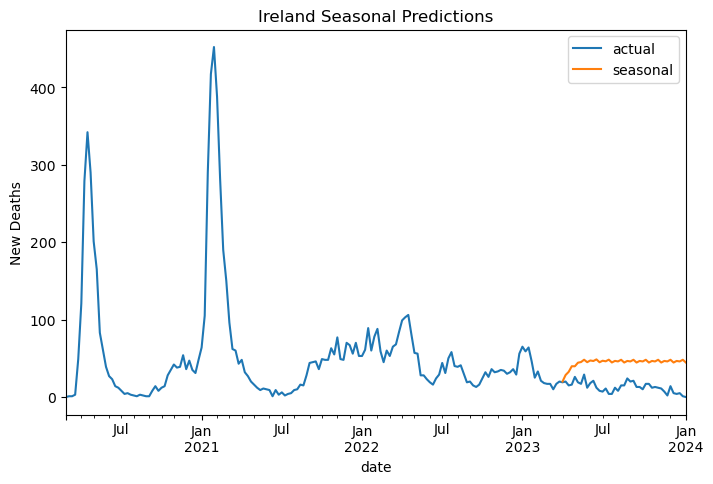

In [33]:
# train test split
train, test = ireland[0:train_size], ireland[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,0,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
ireland_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,0,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
ireland_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,0,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 0, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
ireland_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
ireland_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Ireland Baseline Predictions')
plt.ylabel('New Deaths')

ireland_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Ireland Tuned Predictions')
plt.ylabel('New Deaths')

ireland_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Ireland Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Ireland', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Ireland', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Ireland', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# Israel

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03787D+00    |proj g|=  8.83883D+00

At iterate    5    f=  4.77715D+00    |proj g|=  6.66217D-02

At iterate   10    f=  4.76470D+00    |proj g|=  1.52311D-01

At iterate   15    f=  4.75151D+00    |proj g|=  9.15322D-02

At iterate   20    f=  4.68880D+00    |proj g|=  9.29278D-02

At iterate   25    f=  4.65363D+00    |proj g|=  2.01179D-02

At iterate   30    f=  4.65160D+00    |proj g|=  3.29562D-02

At iterate   35    f=  4.65053D+00    |proj g|=  1.33779D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   20    f=  4.30853D+00    |proj g|=  1.16625D-03

At iterate   25    f=  4.30837D+00    |proj g|=  1.73746D-02

At iterate   30    f=  4.30806D+00    |proj g|=  1.87945D-02

At iterate   35    f=  4.30732D+00    |proj g|=  5.35900D-02

At iterate   40    f=  4.30455D+00    |proj g|=  3.46458D-02

At iterate   45    f=  4.30346D+00    |proj g|=  1.44132D-03

At iterate   50    f=  4.30345D+00    |proj g|=  1.56722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     59      1     0     0   1.567D-04   4.303D+00
  F =   4.3034545480396549     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  4.52338D+00    |proj g|=  3.61599D-02

At iterate   15    f=  4.41945D+00    |proj g|=  3.99265D-01

At iterate   20    f=  4.32877D+00    |proj g|=  3.88499D-02

At iterate   25    f=  4.32854D+00    |proj g|=  1.50600D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     33      1     0     0   1.506D-06   4.329D+00
  F =   4.3285357571163523     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.50239D+00    |proj g|=  6.05185D-02

At iterate   10    f=  4.48900D+00    |proj g|=  3.09481D-02

At iterate   15    f=  4.37996D+00    |proj g|=  1.85903D-01

At iterate   20    f=  4.30308D+00    |proj g|=  2.55147D-02

At iterate   25    f=  4.30258D+00    |proj g|=  4.47510D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     32      1     0     0   4.476D-05   4.303D+00
  F =   4.3025775644330988     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

 This problem is unconstrained.



At iterate   25    f=  4.63437D+00    |proj g|=  1.94427D-01

At iterate   30    f=  4.41756D+00    |proj g|=  3.23368D-01

At iterate   35    f=  4.32547D+00    |proj g|=  1.74290D-01

At iterate   40    f=  4.31158D+00    |proj g|=  1.39927D-02

At iterate   45    f=  4.31149D+00    |proj g|=  1.00369D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     46     55      1     0     0   1.003D-04   4.311D+00
  F =   4.3114896391628754     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate    5    f=  4.41428D+00    |proj g|=  2.83302D-02

At iterate   10    f=  4.35558D+00    |proj g|=  1.69022D-01

At iterate   15    f=  4.22906D+00    |proj g|=  6.66690D-02

At iterate   20    f=  4.22451D+00    |proj g|=  1.32047D-03

At iterate   25    f=  4.22369D+00    |proj g|=  3.01361D-02

At iterate   30    f=  4.22181D+00    |proj g|=  7.33667D-02

At iterate   35    f=  4.21127D+00    |proj g|=  4.63311D-02

At iterate   40    f=  4.20607D+00    |proj g|=  2.55404D-03

At iterate   45    f=  4.20604D+00    |proj g|=  1.76123D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     62   

 This problem is unconstrained.



At iterate   15    f=  4.35634D+00    |proj g|=  4.28968D-01

At iterate   20    f=  4.25715D+00    |proj g|=  1.29322D-02

At iterate   25    f=  4.25707D+00    |proj g|=  7.92411D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     26     34      1     0     0   4.290D-05   4.257D+00
  F =   4.2570668593447225     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.60754D+00    |proj g|=  4.68705D-01


 This problem is unconstrained.



At iterate    5    f=  4.41572D+00    |proj g|=  8.24944D-02

At iterate   10    f=  4.40417D+00    |proj g|=  1.40068D-02

At iterate   15    f=  4.26304D+00    |proj g|=  3.87086D-01

At iterate   20    f=  4.19710D+00    |proj g|=  3.74981D-02

At iterate   25    f=  4.19521D+00    |proj g|=  1.93872D-04

At iterate   30    f=  4.19520D+00    |proj g|=  1.88243D-03

At iterate   35    f=  4.19514D+00    |proj g|=  9.74120D-03

At iterate   40    f=  4.19510D+00    |proj g|=  1.45834D-02

At iterate   45    f=  4.19509D+00    |proj g|=  1.35645D-03

At iterate   50    f=  4.19509D+00    |proj g|=  5.27124D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   10    f=  4.61010D+00    |proj g|=  1.79853D-02

At iterate   15    f=  4.60996D+00    |proj g|=  1.34931D-02

At iterate   20    f=  4.60961D+00    |proj g|=  7.29513D-02

At iterate   25    f=  4.47048D+00    |proj g|=  3.85086D-01

At iterate   30    f=  4.44572D+00    |proj g|=  3.31072D-01

At iterate   35    f=  4.34471D+00    |proj g|=  3.00723D-01

At iterate   40    f=  4.32634D+00    |proj g|=  1.54280D-01

At iterate   45    f=  4.30105D+00    |proj g|=  1.92852D-02

At iterate   50    f=  4.30103D+00    |proj g|=  5.18692D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     65   

 This problem is unconstrained.



At iterate    5    f=  4.29627D+00    |proj g|=  6.98242D-02

At iterate   10    f=  4.27659D+00    |proj g|=  1.58771D-02

At iterate   15    f=  4.24852D+00    |proj g|=  7.25272D-02

At iterate   20    f=  4.20870D+00    |proj g|=  1.19105D-01

At iterate   25    f=  4.19587D+00    |proj g|=  5.45627D-02

At iterate   30    f=  4.18884D+00    |proj g|=  3.26671D-02

At iterate   35    f=  4.18786D+00    |proj g|=  2.46500D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     48      1     0     0   1.112D-04   4.188D+00
  F =   4.1878548624005818     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  4.27059D+00    |proj g|=  6.78021D-02

At iterate   20    f=  4.21387D+00    |proj g|=  3.27510D-01

At iterate   25    f=  4.19020D+00    |proj g|=  2.98230D-03

At iterate   30    f=  4.19020D+00    |proj g|=  1.28822D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     40      1     0     0   1.692D-05   4.190D+00
  F =   4.1901952529451476     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.18984D+00    |proj g|=  2.28471D-02

At iterate   30    f=  4.18946D+00    |proj g|=  5.80841D-02

At iterate   35    f=  4.18805D+00    |proj g|=  1.36057D-02

At iterate   40    f=  4.18787D+00    |proj g|=  2.81341D-03

At iterate   45    f=  4.18786D+00    |proj g|=  4.08238D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     46     56      1     0     0   2.115D-05   4.188D+00
  F =   4.1878565479106538     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   20    f=  4.47326D+00    |proj g|=  4.01827D-02

At iterate   25    f=  4.44919D+00    |proj g|=  3.26147D-02

At iterate   30    f=  4.44909D+00    |proj g|=  1.32600D-03

At iterate   35    f=  4.44903D+00    |proj g|=  6.09261D-02

At iterate   40    f=  4.44875D+00    |proj g|=  2.64225D-03

At iterate   45    f=  4.44874D+00    |proj g|=  3.36599D-03

At iterate   50    f=  4.44872D+00    |proj g|=  1.38488D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   1.385D-03   4.449D+00
  F =   4.4487241663369659     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate   10    f=  4.24674D+00    |proj g|=  1.33916D-02

At iterate   15    f=  4.21662D+00    |proj g|=  1.37469D-01

At iterate   20    f=  4.16148D+00    |proj g|=  7.60871D-03

At iterate   25    f=  4.16139D+00    |proj g|=  1.78936D-03

At iterate   30    f=  4.16136D+00    |proj g|=  1.46754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     33     37      1     0     0   1.032D-04   4.161D+00
  F =   4.1613624224191037     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

 This problem is unconstrained.



At iterate   15    f=  4.26814D+00    |proj g|=  5.64230D-02

At iterate   20    f=  4.18990D+00    |proj g|=  1.93838D-02

At iterate   25    f=  4.18952D+00    |proj g|=  5.07776D-04

At iterate   30    f=  4.18952D+00    |proj g|=  4.95239D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     30     35      1     0     0   4.952D-06   4.190D+00
  F =   4.1895176199560860     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   15    f=  4.23315D+00    |proj g|=  6.57465D-02

At iterate   20    f=  4.17479D+00    |proj g|=  1.65867D-01

At iterate   25    f=  4.16070D+00    |proj g|=  9.11633D-03

At iterate   30    f=  4.16064D+00    |proj g|=  3.44461D-03

At iterate   35    f=  4.16061D+00    |proj g|=  1.09151D-02

At iterate   40    f=  4.16047D+00    |proj g|=  3.99291D-03

At iterate   45    f=  4.16046D+00    |proj g|=  1.16697D-03

At iterate   50    f=  4.16046D+00    |proj g|=  2.82080D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     57      1     0     0   2.821D-04   4.160D+00
  F =   4.16045921398

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.40608D+00    |proj g|=  2.91463D-01

At iterate    5    f=  4.26794D+00    |proj g|=  7.33595D-02

At iterate   10    f=  4.24674D+00    |proj g|=  1.33916D-02

At iterate   15    f=  4.21662D+00    |proj g|=  1.37469D-01

At iterate   20    f=  4.16148D+00    |proj g|=  7.60871D-03

At iterate   25    f=  4.16139D+00    |proj g|=  1.78936D-03

At iterate   30    f=  4.16136D+00    |proj g|=  1.46754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


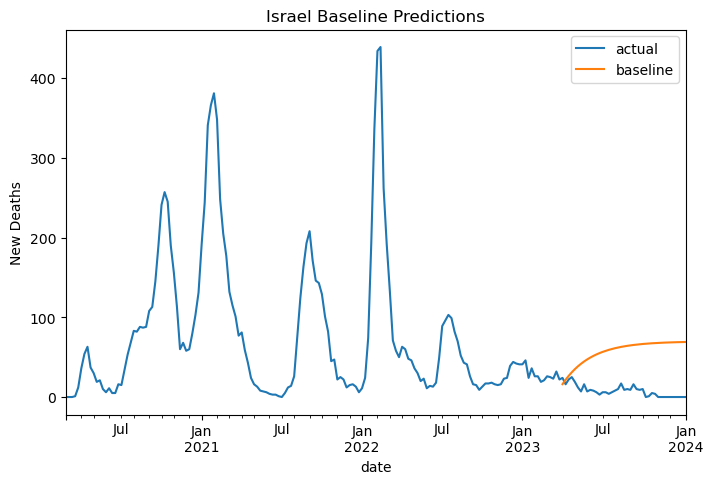

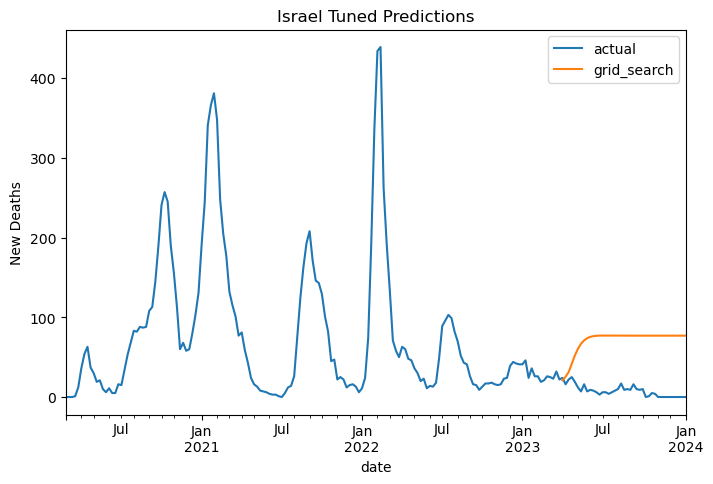

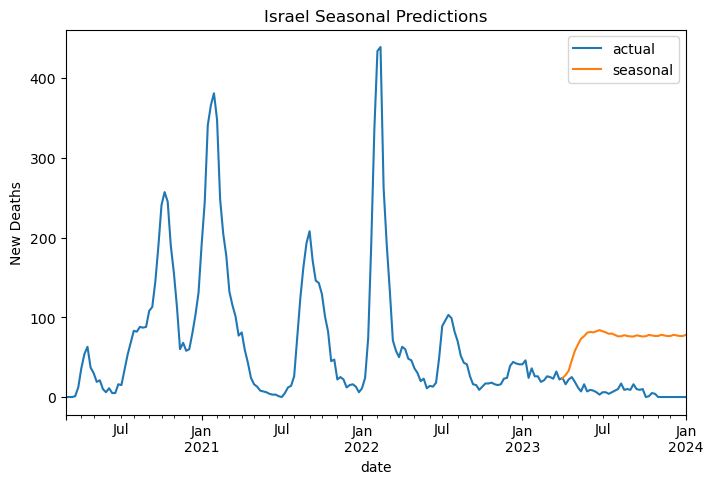

In [34]:
# train test split
train, test = israel[0:train_size], israel[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,0,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
israel_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,0,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
israel_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,0,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 0, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
israel_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
israel_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Israel Baseline Predictions')
plt.ylabel('New Deaths')

israel_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Israel Tuned Predictions')
plt.ylabel('New Deaths')

israel_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Israel Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Israel', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Israel', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Israel', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# Italy

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.78999D+00    |proj g|=  1.83536D-01

At iterate    5    f=  6.73347D+00    |proj g|=  8.26116D-02

At iterate   10    f=  6.70909D+00    |proj g|=  7.99050D-03

At iterate   15    f=  6.70709D+00    |proj g|=  2.96896D-03

At iterate   20    f=  6.65177D+00    |proj g|=  3.59497D-01

At iterate   25    f=  6.54744D+00    |proj g|=  2.85633D-02

At iterate   30    f=  6.54702D+00    |proj g|=  2.88427D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate   25    f=  6.34927D+00    |proj g|=  3.59386D-02

At iterate   30    f=  6.34696D+00    |proj g|=  7.62573D-03

At iterate   35    f=  6.34650D+00    |proj g|=  4.05437D-03

At iterate   40    f=  6.34643D+00    |proj g|=  4.73354D-04

At iterate   45    f=  6.34642D+00    |proj g|=  1.40666D-04

At iterate   50    f=  6.34642D+00    |proj g|=  3.98486D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     62      1     0     0   3.985D-04   6.346D+00
  F =   6.3464190986039215     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  6.56062D+00    |proj g|=  1.52927D-02

At iterate   25    f=  6.40969D+00    |proj g|=  1.22520D-01

At iterate   30    f=  6.39456D+00    |proj g|=  1.27946D-01

At iterate   35    f=  6.37979D+00    |proj g|=  2.30568D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     38     48      1     0     0   5.262D-05   6.380D+00
  F =   6.3797893332182625     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  6.51539D+00    |proj g|=  1.86988D-02

At iterate   30    f=  6.51421D+00    |proj g|=  4.05910D-02

At iterate   35    f=  6.51021D+00    |proj g|=  5.11731D-03

At iterate   40    f=  6.50465D+00    |proj g|=  4.31697D-02

At iterate   45    f=  6.37059D+00    |proj g|=  1.61753D-01

At iterate   50    f=  6.34708D+00    |proj g|=  7.01548D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58      1     0     0   7.015D-02   6.347D+00
  F =   6.3470816382299402     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  6.51437D+00    |proj g|=  2.86130D-02

At iterate   20    f=  6.50127D+00    |proj g|=  1.05518D-01

At iterate   25    f=  6.49976D+00    |proj g|=  2.08405D-03

At iterate   30    f=  6.49821D+00    |proj g|=  4.46351D-03

At iterate   35    f=  6.49805D+00    |proj g|=  6.05006D-03

At iterate   40    f=  6.48036D+00    |proj g|=  2.83383D-01

At iterate   45    f=  6.40847D+00    |proj g|=  8.91992D-02

At iterate   50    f=  6.40687D+00    |proj g|=  1.42598D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     60      1     0     0   1.426D-02   6.407D+00
  F =   6.40686840637

 This problem is unconstrained.



At iterate   10    f=  6.28076D+00    |proj g|=  3.93243D-02

At iterate   15    f=  6.26952D+00    |proj g|=  1.67654D-02

At iterate   20    f=  6.26827D+00    |proj g|=  1.55054D-03

At iterate   25    f=  6.26782D+00    |proj g|=  1.00693D-02

At iterate   30    f=  6.17324D+00    |proj g|=  2.40446D-01

At iterate   35    f=  6.15931D+00    |proj g|=  7.34089D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     38     43      1     0     0   1.081D-05   6.159D+00
  F =   6.1593070276263360     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  6.37603D+00    |proj g|=  2.14247D-02

At iterate   15    f=  6.37303D+00    |proj g|=  3.05683D-03

At iterate   20    f=  6.37291D+00    |proj g|=  6.16387D-03

At iterate   25    f=  6.37096D+00    |proj g|=  3.10147D-02

At iterate   30    f=  6.36509D+00    |proj g|=  4.72539D-02

At iterate   35    f=  6.34120D+00    |proj g|=  1.01332D-01

At iterate   40    f=  6.29902D+00    |proj g|=  1.56080D-01

At iterate   45    f=  6.28867D+00    |proj g|=  1.96782D-02

At iterate   50    f=  6.28643D+00    |proj g|=  2.99822D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     58   

 This problem is unconstrained.



At iterate    5    f=  6.29272D+00    |proj g|=  5.68204D-02

At iterate   10    f=  6.27882D+00    |proj g|=  8.07732D-03

At iterate   15    f=  6.26752D+00    |proj g|=  1.73439D-02

At iterate   20    f=  6.26694D+00    |proj g|=  2.19874D-03

At iterate   25    f=  6.26617D+00    |proj g|=  3.24482D-02

At iterate   30    f=  6.20565D+00    |proj g|=  9.02221D-02

At iterate   35    f=  6.17474D+00    |proj g|=  1.15400D-02

At iterate   40    f=  6.17435D+00    |proj g|=  3.09325D-02

At iterate   45    f=  6.17381D+00    |proj g|=  5.13645D-03

At iterate   50    f=  6.17381D+00    |proj g|=  1.30139D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   25    f=  6.51307D+00    |proj g|=  5.68427D-03

At iterate   30    f=  6.50940D+00    |proj g|=  2.00147D-01

At iterate   35    f=  6.47904D+00    |proj g|=  1.22102D-01

At iterate   40    f=  6.47758D+00    |proj g|=  4.26164D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     49      1     0     0   1.357D-05   6.478D+00
  F =   6.4775825006704846     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   10    f=  6.30112D+00    |proj g|=  9.94865D-03

At iterate   15    f=  6.28906D+00    |proj g|=  9.17056D-02

At iterate   20    f=  6.27888D+00    |proj g|=  4.64071D-02

At iterate   25    f=  6.27794D+00    |proj g|=  6.11341D-03

At iterate   30    f=  6.27792D+00    |proj g|=  9.38920D-03

At iterate   35    f=  6.27756D+00    |proj g|=  4.31145D-02

At iterate   40    f=  6.27056D+00    |proj g|=  1.26086D-01

At iterate   45    f=  6.20700D+00    |proj g|=  3.16930D-01

At iterate   50    f=  6.20254D+00    |proj g|=  7.36363D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate   25    f=  6.28235D+00    |proj g|=  1.11100D-02

At iterate   30    f=  6.25838D+00    |proj g|=  1.48560D+00

At iterate   35    f=  6.20682D+00    |proj g|=  5.05139D-02

At iterate   40    f=  6.20679D+00    |proj g|=  1.71301D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     40     50      1     0     0   1.713D-04   6.207D+00
  F =   6.2067944953691425     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  6.27746D+00    |proj g|=  6.02100D-03

At iterate   30    f=  6.27726D+00    |proj g|=  5.93637D-03

At iterate   35    f=  6.27725D+00    |proj g|=  1.46880D-03

At iterate   40    f=  6.27699D+00    |proj g|=  3.37467D-02

At iterate   45    f=  6.27167D+00    |proj g|=  1.23962D-01

At iterate   50    f=  6.26272D+00    |proj g|=  7.05734D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   7.057D-02   6.263D+00
  F =   6.2627205337471992     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   30    f=  6.43394D+00    |proj g|=  4.28105D-02

At iterate   35    f=  6.43145D+00    |proj g|=  2.66320D-02

At iterate   40    f=  6.42779D+00    |proj g|=  1.48288D-02

At iterate   45    f=  6.42774D+00    |proj g|=  1.95946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     51      1     0     0   1.959D-04   6.428D+00
  F =   6.4277393061983972     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  6.19365D+00    |proj g|=  1.24559D-01

At iterate   10    f=  6.17391D+00    |proj g|=  1.33511D-01

At iterate   15    f=  6.14848D+00    |proj g|=  3.78814D-02

At iterate   20    f=  6.14195D+00    |proj g|=  1.28592D-01

At iterate   25    f=  6.13968D+00    |proj g|=  2.16831D-02

At iterate   30    f=  6.13891D+00    |proj g|=  1.59108D-03

At iterate   35    f=  6.13872D+00    |proj g|=  1.65508D-02

At iterate   40    f=  6.13305D+00    |proj g|=  1.01574D-01

At iterate   45    f=  6.11253D+00    |proj g|=  2.12046D-01

At iterate   50    f=  6.06767D+00    |proj g|=  8.08677D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  6.19484D+00    |proj g|=  6.29499D-02

At iterate   20    f=  6.18844D+00    |proj g|=  8.11331D-03

At iterate   25    f=  6.18832D+00    |proj g|=  2.39580D-03

At iterate   30    f=  6.18817D+00    |proj g|=  8.96941D-03

At iterate   35    f=  6.18003D+00    |proj g|=  1.02123D-01

At iterate   40    f=  6.11835D+00    |proj g|=  9.46839D-02

At iterate   45    f=  6.11728D+00    |proj g|=  9.09383D-03

At iterate   50    f=  6.11717D+00    |proj g|=  8.22979D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     55      1     0     0   8.230D-04   6.117D+00
  F =   6.11716636589

 This problem is unconstrained.



At iterate    5    f=  6.19527D+00    |proj g|=  8.06837D-02

At iterate   10    f=  6.14716D+00    |proj g|=  4.69897D-02

At iterate   15    f=  6.13750D+00    |proj g|=  1.51834D-02

At iterate   20    f=  6.13533D+00    |proj g|=  1.34040D-02

At iterate   25    f=  6.13406D+00    |proj g|=  4.36110D-02

At iterate   30    f=  6.13217D+00    |proj g|=  2.20441D-02

At iterate   35    f=  6.13204D+00    |proj g|=  1.66058D-03

At iterate   40    f=  6.13163D+00    |proj g|=  1.98230D-02

At iterate   45    f=  6.11502D+00    |proj g|=  1.15617D-01

At iterate   50    f=  6.05692D+00    |proj g|=  4.57751D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  6.19527D+00    |proj g|=  8.06837D-02

At iterate   10    f=  6.14716D+00    |proj g|=  4.69897D-02

At iterate   15    f=  6.13750D+00    |proj g|=  1.51834D-02

At iterate   20    f=  6.13533D+00    |proj g|=  1.34040D-02

At iterate   25    f=  6.13406D+00    |proj g|=  4.36110D-02

At iterate   30    f=  6.13217D+00    |proj g|=  2.20441D-02

At iterate   35    f=  6.13204D+00    |proj g|=  1.66058D-03

At iterate   40    f=  6.13163D+00    |proj g|=  1.98230D-02

At iterate   45    f=  6.11502D+00    |proj g|=  1.15617D-01

At iterate   50    f=  6.05692D+00    |proj g|=  4.57751D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


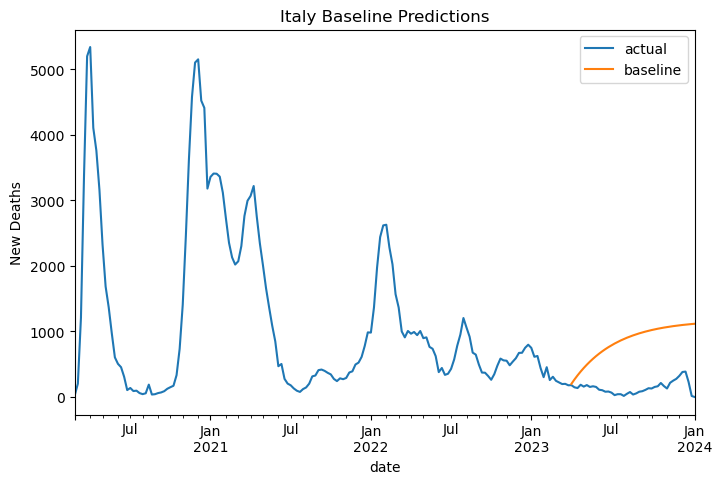

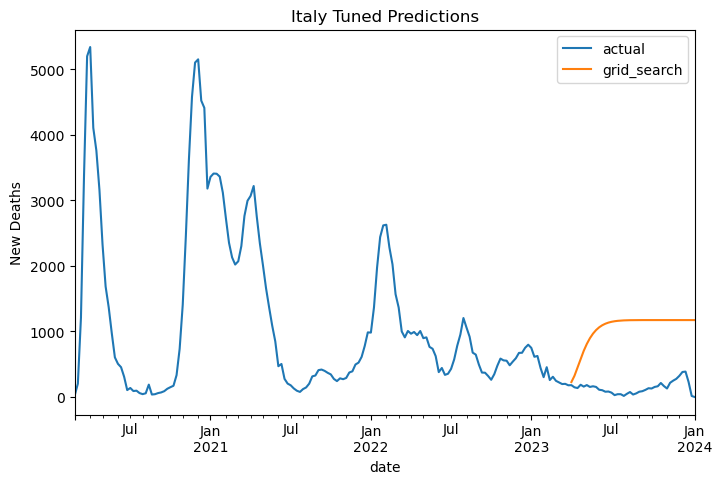

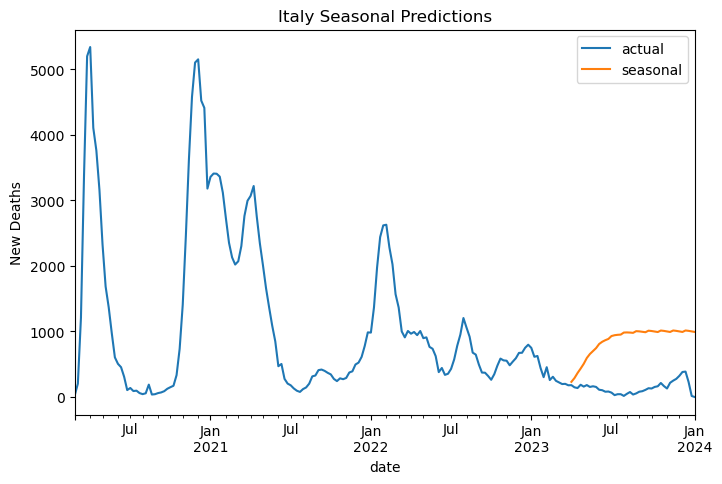

In [35]:
# train test split
train, test = italy[0:train_size], italy[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,0,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
italy_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,0,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,0,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
italy_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,0,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 0, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
italy_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
italy_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Italy Baseline Predictions')
plt.ylabel('New Deaths')

italy_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Italy Tuned Predictions')
plt.ylabel('New Deaths')

italy_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Italy Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Italy', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Italy', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Italy', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

# Malaysia 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79444D+00    |proj g|=  6.30221D-02

At iterate    5    f=  5.76100D+00    |proj g|=  4.53934D-03

At iterate   10    f=  5.75721D+00    |proj g|=  8.73755D-03

At iterate   15    f=  5.65204D+00    |proj g|=  1.86256D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     25      1     0     0   8.014D-06   5.652D+00
  F =   5.6518043238828897     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.
 This problem is unconstrained.



At iterate   10    f=  5.61138D+00    |proj g|=  6.48746D-02

At iterate   15    f=  5.58997D+00    |proj g|=  2.35720D-02

At iterate   20    f=  5.51779D+00    |proj g|=  2.08076D-02

At iterate   25    f=  5.51277D+00    |proj g|=  1.29927D-03

At iterate   30    f=  5.51218D+00    |proj g|=  1.09801D-02

At iterate   35    f=  5.51087D+00    |proj g|=  1.03366D-02

At iterate   40    f=  5.51070D+00    |proj g|=  9.02150D-04

At iterate   45    f=  5.51068D+00    |proj g|=  5.47756D-04

At iterate   50    f=  5.51067D+00    |proj g|=  1.61274D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.68435D+00    |proj g|=  5.13923D-02

At iterate    5    f=  5.64403D+00    |proj g|=  1.15735D-02

At iterate   10    f=  5.64167D+00    |proj g|=  3.24579D-03

At iterate   15    f=  5.54704D+00    |proj g|=  8.00232D-02

At iterate   20    f=  5.53271D+00    |proj g|=  8.02719D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     23     29      1     0     0   1.123D-05   5.533D+00
  F =   5.5327096947984700     

CONVERG

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.61282D+00    |proj g|=  1.95088D-02

At iterate    5    f=  5.60674D+00    |proj g|=  8.70066D-03

At iterate   10    f=  5.60183D+00    |proj g|=  1.30366D-02

At iterate   15    f=  5.60026D+00    |proj g|=  1.60237D-02

At iterate   20    f=  5.54850D+00    |proj g|=  1.13721D-01

At iterate   25    f=  5.49732D+00    |proj g|=  9.87692D-03

At iterate   30    f=  5.49712D+00    |proj g|=  2.03291D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.72252D+00    |proj g|=  1.05344D-02

At iterate   10    f=  5.71945D+00    |proj g|=  3.42252D-03

At iterate   15    f=  5.69353D+00    |proj g|=  8.98646D-02

At iterate   20    f=  5.59371D+00    |proj g|=  7.97719D-03

At iterate   25    f=  5.59359D+00    |proj g|=  8.18101D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     25     33      1     0     0   8.181D-07   5.594D+00
  F =   5.5935872084587857     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

 This problem is unconstrained.



At iterate   20    f=  5.54970D+00    |proj g|=  3.56789D-02

At iterate   25    f=  5.48451D+00    |proj g|=  5.36618D-02

At iterate   30    f=  5.45676D+00    |proj g|=  6.01378D-03

At iterate   35    f=  5.45351D+00    |proj g|=  3.44133D-02

At iterate   40    f=  5.44882D+00    |proj g|=  1.36536D-02

At iterate   45    f=  5.44824D+00    |proj g|=  1.28970D-03

At iterate   50    f=  5.44818D+00    |proj g|=  3.36788D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59      1     0     0   3.368D-04   5.448D+00
  F =   5.4481811943107008     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  5.64121D+00    |proj g|=  1.79436D-02

At iterate   10    f=  5.63608D+00    |proj g|=  5.50402D-03

At iterate   15    f=  5.62176D+00    |proj g|=  4.80799D-02

At iterate   20    f=  5.56118D+00    |proj g|=  5.48360D-02

At iterate   25    f=  5.50604D+00    |proj g|=  3.65731D-02

At iterate   30    f=  5.50188D+00    |proj g|=  3.19358D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     32     40      1     0     0   9.655D-06   5.502D+00
  F =   5.5018697094543692     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  5.55674D+00    |proj g|=  8.45177D-03

At iterate   20    f=  5.53397D+00    |proj g|=  9.63321D-02

At iterate   25    f=  5.45121D+00    |proj g|=  4.88897D-02

At iterate   30    f=  5.44136D+00    |proj g|=  1.25166D-02

At iterate   35    f=  5.44056D+00    |proj g|=  3.64069D-03

At iterate   40    f=  5.43427D+00    |proj g|=  5.85415D-02

At iterate   45    f=  5.43086D+00    |proj g|=  3.57669D-03

At iterate   50    f=  5.43068D+00    |proj g|=  2.07924D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     63      1     0     0   2.079D-04   5.431D+00
  F =   5.43068282370

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.79475D+00    |proj g|=  5.32865D-01

At iterate    5    f=  5.73664D+00    |proj g|=  6.15343D-02

At iterate   10    f=  5.71635D+00    |proj g|=  1.91286D-02

At iterate   15    f=  5.71397D+00    |proj g|=  3.11911D-03

At iterate   20    f=  5.71188D+00    |proj g|=  1.30655D-02

At iterate   25    f=  5.71044D+00    |proj g|=  1.76822D-02

At iterate   30    f=  5.65887D+00    |proj g|=  2.16571D-01

At iterate   35    f=  5.64140D+00    |proj g|=  7.46286D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  5.57180D+00    |proj g|=  3.21990D-02

At iterate   15    f=  5.56770D+00    |proj g|=  3.87042D-03

At iterate   20    f=  5.56589D+00    |proj g|=  4.18156D-02

At iterate   25    f=  5.54488D+00    |proj g|=  1.09473D-01

At iterate   30    f=  5.51020D+00    |proj g|=  3.27029D-02

At iterate   35    f=  5.50910D+00    |proj g|=  1.00285D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     37     40      1     0     0   2.114D-05   5.509D+00
  F =   5.5090982962642316     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   10    f=  5.56138D+00    |proj g|=  3.06924D-02

At iterate   15    f=  5.55841D+00    |proj g|=  3.02714D-03

At iterate   20    f=  5.55696D+00    |proj g|=  6.76649D-03

At iterate   25    f=  5.53985D+00    |proj g|=  8.75015D-02

At iterate   30    f=  5.48720D+00    |proj g|=  1.30771D-02

At iterate   35    f=  5.48659D+00    |proj g|=  6.74370D-03

At iterate   40    f=  5.48624D+00    |proj g|=  1.03848D-03

At iterate   45    f=  5.48621D+00    |proj g|=  5.68130D-04

At iterate   50    f=  5.48621D+00    |proj g|=  6.78576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     59   

 This problem is unconstrained.



At iterate   20    f=  5.55670D+00    |proj g|=  3.92914D-03

At iterate   25    f=  5.55202D+00    |proj g|=  2.45641D-02

At iterate   30    f=  5.54199D+00    |proj g|=  4.02365D-02

At iterate   35    f=  5.50994D+00    |proj g|=  1.20398D-01

At iterate   40    f=  5.49438D+00    |proj g|=  2.61118D-02

At iterate   45    f=  5.48804D+00    |proj g|=  2.76136D-02

At iterate   50    f=  5.48501D+00    |proj g|=  7.78035D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57      1     0     0   7.780D-03   5.485D+00
  F =   5.4850137022779730     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  5.68800D+00    |proj g|=  9.47801D-02

At iterate   10    f=  5.67124D+00    |proj g|=  1.36439D-02

At iterate   15    f=  5.66819D+00    |proj g|=  8.78042D-03

At iterate   20    f=  5.66770D+00    |proj g|=  2.41138D-02

At iterate   25    f=  5.66148D+00    |proj g|=  2.00908D-02

At iterate   30    f=  5.63899D+00    |proj g|=  1.00882D-01

At iterate   35    f=  5.59315D+00    |proj g|=  1.59798D-01

At iterate   40    f=  5.59162D+00    |proj g|=  7.65652D-02

At iterate   45    f=  5.57249D+00    |proj g|=  1.35431D-01

At iterate   50    f=  5.56906D+00    |proj g|=  1.83709D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.54034D+00    |proj g|=  9.11656D-02

At iterate    5    f=  5.53142D+00    |proj g|=  2.81848D-02

At iterate   10    f=  5.52152D+00    |proj g|=  9.65959D-03

At iterate   15    f=  5.52079D+00    |proj g|=  9.06150D-03

At iterate   20    f=  5.51907D+00    |proj g|=  2.30281D-02

At iterate   25    f=  5.51289D+00    |proj g|=  3.60955D-02

At iterate   30    f=  5.47567D+00    |proj g|=  7.14426D-02

At iterate   35    f=  5.44862D+00    |proj g|=  9.50662D-03

At iterate   40    f=  5.42781D+00    |proj g|=  3.06758D-02

At iterate   45    f=  5.42012D+00    |proj g|=  3.64773D-02

At iterate   50    f=  5.41949D+00    |proj g|=  3.61311D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.62593D+00    |proj g|=  1.63210D-01

At iterate    5    f=  5.57921D+00    |proj g|=  5.82273D-02

At iterate   10    f=  5.55092D+00    |proj g|=  8.44626D-03

At iterate   15    f=  5.55004D+00    |proj g|=  1.68921D-02

At iterate   20    f=  5.47846D+00    |proj g|=  1.92793D-01

At iterate   25    f=  5.45143D+00    |proj g|=  6.13505D-03

At iterate   30    f=  5.45092D+00    |proj g|=  7.92887D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.52198D+00    |proj g|=  2.62478D-02

At iterate   10    f=  5.51328D+00    |proj g|=  8.59105D-03

At iterate   15    f=  5.51107D+00    |proj g|=  8.29654D-03

At iterate   20    f=  5.51023D+00    |proj g|=  7.87885D-03

At iterate   25    f=  5.50778D+00    |proj g|=  3.01156D-02

At iterate   30    f=  5.49176D+00    |proj g|=  2.82201D-02

At iterate   35    f=  5.45163D+00    |proj g|=  8.32449D-02

At iterate   40    f=  5.43785D+00    |proj g|=  8.63882D-02

At iterate   45    f=  5.41642D+00    |proj g|=  1.92059D-02

At iterate   50    f=  5.41290D+00    |proj g|=  3.88001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.52198D+00    |proj g|=  2.62478D-02

At iterate   10    f=  5.51328D+00    |proj g|=  8.59105D-03

At iterate   15    f=  5.51107D+00    |proj g|=  8.29654D-03

At iterate   20    f=  5.51023D+00    |proj g|=  7.87885D-03

At iterate   25    f=  5.50778D+00    |proj g|=  3.01156D-02

At iterate   30    f=  5.49176D+00    |proj g|=  2.82201D-02

At iterate   35    f=  5.45163D+00    |proj g|=  8.32449D-02

At iterate   40    f=  5.43785D+00    |proj g|=  8.63882D-02

At iterate   45    f=  5.41642D+00    |proj g|=  1.92059D-02

At iterate   50    f=  5.41290D+00    |proj g|=  3.88001D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

,Country,Model,MAE,MAPE
0,US,Baseline ARIMA,2383.283951,9562.025136
1,US,Grid Search ARIMA,2383.283951,9562.025136
2,US,Seasonal ARIMA,2383.283951,9562.025136
3,US,Baseline ARIMA,2383.283951,9562.025136
4,US,Grid Search ARIMA,2383.283951,9562.025136
5,US,Seasonal ARIMA,2383.283951,9562.025136
6,US,Baseline ARIMA,72.776279,5571.608078
7,US,Grid Search ARIMA,185.698730,247263.954725
8,US,Seasonal ARIMA,30.678135,2469.420800
9,Chile,Baseline ARIMA,362.585326,5546.323994


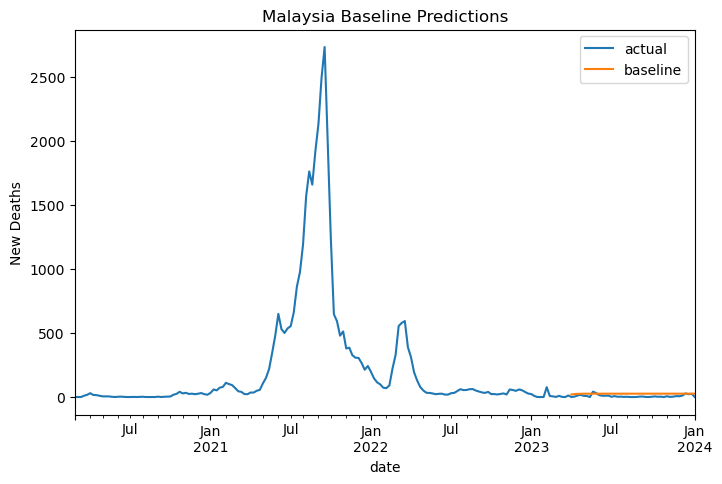

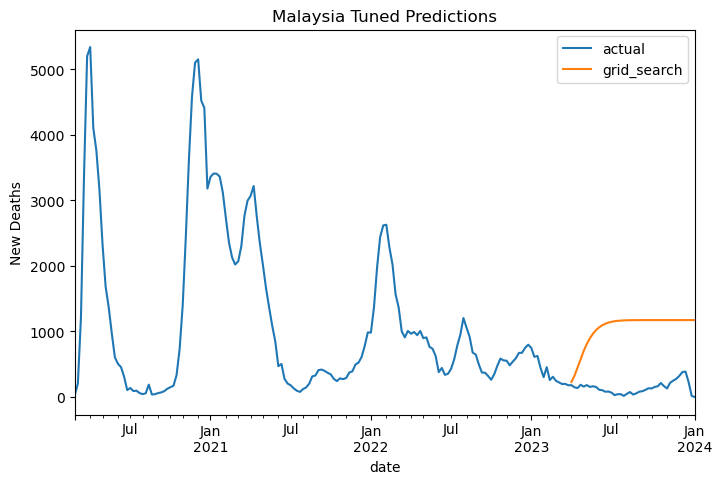

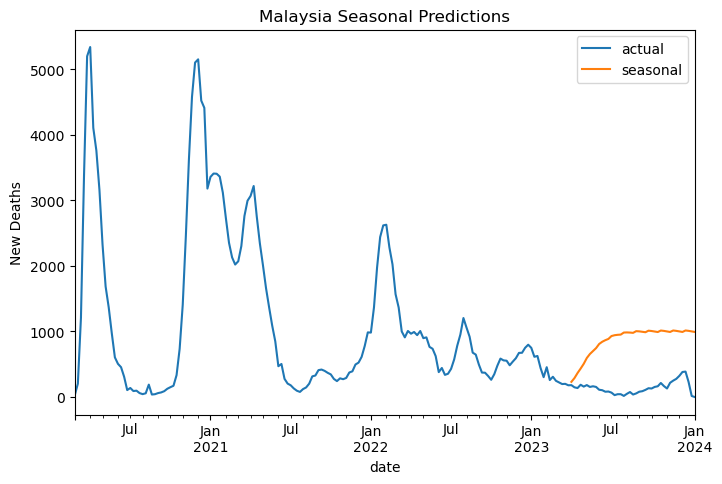

In [36]:
# train test split
train, test = malaysia[0:train_size], malaysia[train_size:]

warnings.filterwarnings("ignore")
#baseline
model = ARIMA(train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
pred=model_fit.predict(start=train_size,end = 201, dynamic=True)
malaysia_df['baseline'] = pred
baseline_mae = mean_absolute_error(test['new_deaths'], pred)
baseline_mape = mape(test['new_deaths'], pred)

#grid search for p and q 
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
model = ARIMA(train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
malaysia_df['grid_search'] = pred
grid_search_mae = mean_absolute_error(test['new_deaths'], pred)
grid_search_mape = mape(test['new_deaths'], pred)
#seasonal ARIMA
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,4),enforce_stationarity=False)
model_fit=model.fit()
pred = model_fit.predict(start=train_size, end=201, dynamic=True)
malaysia_df['seasonal'] = pred
seasonal_mae = mean_absolute_error(test['new_deaths'], pred)
seasonal_mape = mape(test['new_deaths'], pred)
#plots
malaysia_df[['actual','baseline']].plot(figsize=(8,5))
plt.title('Malaysia Baseline Predictions')
plt.ylabel('New Deaths')

italy_df[['actual','grid_search']].plot(figsize=(8,5))
plt.title('Malaysia Tuned Predictions')
plt.ylabel('New Deaths')

italy_df[['actual','seasonal']].plot(figsize=(8,5))
plt.title('Malaysia Seasonal Predictions')
plt.ylabel('New Deaths')

# evaluation
evaluation = evaluation.append({'Country':'Malaysia', 'Model':'Baseline ARIMA', 'MAE':baseline_mae, 'MAPE':baseline_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Malaysia', 'Model':'Grid Search ARIMA', 'MAE':grid_search_mae, 'MAPE':grid_search_mape}, ignore_index=True)
evaluation = evaluation.append({'Country':'Malaysia', 'Model':'Seasonal ARIMA', 'MAE':seasonal_mae, 'MAPE':seasonal_mape}, ignore_index=True)
evaluation

In [120]:
# def get_df_name(df):
#     name =[x for x in globals() if globals()[x] is df][0]
#     return name
# # arima loop for countries with differencing 
# country_list_differenced = [czechia, estonia, france, malaysia, us]

# baseline_predictions = {'czechia':[], 'estonia':[], 'france':[], 'malaysia':[], 'us': [], 'belgium':[], 'chile':[], 'ireland':[], 'israel':[], 'italy':[]}
# grid_search_predictions = {'czechia':[], 'estonia':[], 'france':[], 'malaysia':[], 'us': [], 'belgium':[], 'chile':[], 'ireland':[], 'israel':[], 'italy':[]}
# seasonal_predictions = {'czechia':[], 'estonia':[], 'france':[], 'malaysia':[], 'us': [], 'belgium':[], 'chile':[], 'ireland':[], 'israel':[], 'italy':[]}

# for country in country_list_differenced:
#     train, test = country[0:train_size], country[train_size:]
#     # baseline ARIMA 
#     warnings.filterwarnings("ignore")
#     model = ARIMA(train['new_deaths'], order=(1,1,1))
#     model_fit = model.fit()
#     baseline_pred =model_fit.predict(start=train_size,end = 201, dynamic=True)
#     baseline_predictions[get_df_name(country)] = baseline_pred
#     # grid search for best p and q
#     results = []
#     for p in range(1,5):
#         for q in range(1,5): 
#             model = ARIMA(train['new_deaths'], order=(p,1,q)).fit()
#             results.append([p,q,model.aic])
#     results_df = pd.DataFrame(results)
#     results_df.columns = ['p','q','aic']
#     results_df = results_df.sort_values('aic')
#     p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
#     # grid search ARIMA 
#     model = ARIMA(train['new_deaths'], order=(p,1,q))
#     model_fit = model.fit()
#     grid_search_pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
#     grid_search_predictions[get_df_name(country)] = grid_search_pred
#     # seasonal ARIMA
#     warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
#     warnings.filterwarnings("ignore",category =  UserWarning)
#     warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
#     if 1:
#         results=[]
#         for p in range(1,3):
#             for q in range(1,3):
#                 for P in range(1,3):
#                     for Q in range(1,3):
#                         model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,4)).fit()
#                         results.append([p,q,P,Q,model.aic])
#     df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
#     p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
#     model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,12))
#     model_fit=model.fit()
#     seasonal_pred = model_fit.predict(start=train_size, end=201, dynamic=True)
#     seasonal_predictions[get_df_name(country)] = seasonal_pred

# # arima loop for countries without differencing 

# country_list = [belgium, chile, ireland, israel, italy] 
# for country in country_list:
#     train, test = country[0:train_size], country[train_size:]
#     # baseline ARIMA 
#     warnings.filterwarnings("ignore")
#     model = ARIMA(train['new_deaths'], order=(1,0,1))
#     model_fit = model.fit()
#     baseline_pred =model_fit.predict(start=train_size,end = 201, dynamic=True)
#     baseline_predictions[get_df_name(country)] = baseline_pred
#     # grid search for best p and q
#     results = []
#     for p in range(1,5):
#         for q in range(1,5): 
#             model = ARIMA(train['new_deaths'], order=(p,0,q)).fit()
#             results.append([p,q,model.aic])
#     results_df = pd.DataFrame(results)
#     results_df.columns = ['p','q','aic']
#     results_df = results_df.sort_values('aic')
#     p,q,= results_df.iloc[0,0], results_df.iloc[0,1]
#     # grid search ARIMA 
#     model = ARIMA(train['new_deaths'], order=(p,0,q))
#     model_fit = model.fit()
#     grid_search_pred = model_fit.predict(start=train_size, end = 201,dynamic=True)
#     grid_search_predictions[get_df_name(country)] = grid_search_pred
#     # seasonal ARIMA
#     warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
#     warnings.filterwarnings("ignore",category =  UserWarning)
#     warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
#     if 1:
#         results=[]
#         for p in range(1,3):
#             for q in range(1,3):
#                 for P in range(1,3):
#                     for Q in range(1,3):
#                         model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p,0,q), seasonal_order=(P,1,Q,4),enforce_stationarity=False).fit()
#                         results.append([p,q,P,Q,model.aic])
#     df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
#     p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
#     model=sm.tsa.statespace.SARIMAX(train['new_deaths'],order=(p, 0, q),seasonal_order=(P,1,Q,12))
#     model_fit=model.fit()
#     seasonal_pred = model_fit.predict(start=train_size, end=201, dynamic=True)
#     seasonal_predictions[get_df_name(country)] = seasonal_pred


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.75209D+00    |proj g|=  1.04590D-01

At iterate    5    f=  5.68124D+00    |proj g|=  2.96583D-02

At iterate   10    f=  5.62799D+00    |proj g|=  1.01634D-01

At iterate   15    f=  5.51378D+00    |proj g|=  1.43042D-02

At iterate   20    f=  5.51331D+00    |proj g|=  3.37774D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     27      1     0     0   3.378D-07   5.513D+00
  F =   5.5133055715716104     

CONVERG

 This problem is unconstrained.



At iterate   15    f=  5.53769D+00    |proj g|=  3.74077D-02

At iterate   20    f=  5.52013D+00    |proj g|=  1.41832D-02

At iterate   25    f=  5.51919D+00    |proj g|=  3.39703D-03

At iterate   30    f=  5.51783D+00    |proj g|=  7.07601D-03

At iterate   35    f=  5.51417D+00    |proj g|=  3.61565D-02

At iterate   40    f=  5.51001D+00    |proj g|=  1.77845D-03

At iterate   45    f=  5.51000D+00    |proj g|=  7.96414D-04

At iterate   50    f=  5.50999D+00    |proj g|=  2.41704D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     69      1     0     0   2.417D-04   5.510D+00
  F =   5.50998947695

 This problem is unconstrained.



At iterate   20    f=  5.50967D+00    |proj g|=  3.04431D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     24     28      1     0     0   5.448D-06   5.510D+00
  F =   5.5096552754949411     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.72356D+00    |proj g|=  1.67910D-01

At iterate    5    f=  5.68155D+00    |proj g|=  7.78961D-03


 This problem is unconstrained.



At iterate   10    f=  5.67868D+00    |proj g|=  1.15469D-02

At iterate   15    f=  5.59238D+00    |proj g|=  1.48287D-01

At iterate   20    f=  5.51817D+00    |proj g|=  2.27610D-02

At iterate   25    f=  5.51272D+00    |proj g|=  7.28919D-05

At iterate   30    f=  5.51272D+00    |proj g|=  7.45159D-04

At iterate   35    f=  5.51265D+00    |proj g|=  2.50640D-03

At iterate   40    f=  5.51262D+00    |proj g|=  9.87000D-04

At iterate   45    f=  5.51260D+00    |proj g|=  4.26128D-04

At iterate   50    f=  5.51259D+00    |proj g|=  5.79962D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     50     55   

 This problem is unconstrained.



At iterate   10    f=  5.68990D+00    |proj g|=  1.31313D-02

At iterate   15    f=  5.57966D+00    |proj g|=  8.03284D-02

At iterate   20    f=  5.57079D+00    |proj g|=  7.27246D-03

At iterate   25    f=  5.55048D+00    |proj g|=  1.76253D-01

At iterate   30    f=  5.51278D+00    |proj g|=  2.28363D-03

At iterate   35    f=  5.51275D+00    |proj g|=  4.12781D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     53      1     0     0   4.605D-06   5.513D+00
  F =   5.5127455358999589     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  5.69714D+00    |proj g|=  1.88447D-02

At iterate   10    f=  5.69308D+00    |proj g|=  9.41791D-03

At iterate   15    f=  5.65617D+00    |proj g|=  2.20411D-02

At iterate   20    f=  5.58372D+00    |proj g|=  1.28383D-02

At iterate   25    f=  5.58030D+00    |proj g|=  1.33205D-02

At iterate   30    f=  5.57559D+00    |proj g|=  1.75600D-02

At iterate   35    f=  5.56335D+00    |proj g|=  4.51994D-02

At iterate   40    f=  5.54038D+00    |proj g|=  6.77294D-02

At iterate   45    f=  5.51013D+00    |proj g|=  1.34703D-02

At iterate   50    f=  5.50934D+00    |proj g|=  4.26688D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.69724D+00    |proj g|=  2.07899D-02

At iterate   10    f=  5.68907D+00    |proj g|=  5.43681D-03

At iterate   15    f=  5.59056D+00    |proj g|=  4.85346D-02

At iterate   20    f=  5.57912D+00    |proj g|=  1.54393D-03

At iterate   25    f=  5.57855D+00    |proj g|=  8.96446D-03

At iterate   30    f=  5.57837D+00    |proj g|=  2.08680D-04

At iterate   35    f=  5.57805D+00    |proj g|=  2.58704D-02

At iterate   40    f=  5.57429D+00    |proj g|=  1.31173D-01

At iterate   45    f=  5.52729D+00    |proj g|=  1.08627D-01

At iterate   50    f=  5.51253D+00    |proj g|=  2.46828D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate   15    f=  5.62394D+00    |proj g|=  4.38243D-02

At iterate   20    f=  5.51384D+00    |proj g|=  4.47167D-02

At iterate   25    f=  5.51242D+00    |proj g|=  3.06499D-03

At iterate   30    f=  5.51225D+00    |proj g|=  1.33564D-03

At iterate   35    f=  5.51205D+00    |proj g|=  1.65267D-03

At iterate   40    f=  5.51198D+00    |proj g|=  6.15886D-04

At iterate   45    f=  5.51198D+00    |proj g|=  2.88840D-04

At iterate   50    f=  5.51195D+00    |proj g|=  1.31386D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     54      1     0     0   1.314D-03   5.512D+00
  F =   5.51195196258

 This problem is unconstrained.



At iterate    5    f=  5.63174D+00    |proj g|=  2.89351D-02

At iterate   10    f=  5.61975D+00    |proj g|=  4.87799D-03

At iterate   15    f=  5.52463D+00    |proj g|=  3.53454D-02

At iterate   20    f=  5.52157D+00    |proj g|=  1.29286D-02

At iterate   25    f=  5.52127D+00    |proj g|=  4.81204D-05

At iterate   30    f=  5.52127D+00    |proj g|=  1.65666D-03

At iterate   35    f=  5.52115D+00    |proj g|=  5.65181D-03

At iterate   40    f=  5.52084D+00    |proj g|=  5.90463D-03

At iterate   45    f=  5.51038D+00    |proj g|=  5.62368D-02

At iterate   50    f=  5.50723D+00    |proj g|=  1.58266D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.62523D+00    |proj g|=  5.70485D-03

At iterate   10    f=  5.61460D+00    |proj g|=  1.26036D-02

At iterate   15    f=  5.60858D+00    |proj g|=  5.67229D-03

At iterate   20    f=  5.58572D+00    |proj g|=  4.68463D-02

At iterate   25    f=  5.53310D+00    |proj g|=  4.81305D-02

At iterate   30    f=  5.52808D+00    |proj g|=  1.25134D-03

At iterate   35    f=  5.52725D+00    |proj g|=  8.42299D-03

At iterate   40    f=  5.52634D+00    |proj g|=  2.30942D-03

At iterate   45    f=  5.52624D+00    |proj g|=  2.40924D-04

At iterate   50    f=  5.52621D+00    |proj g|=  1.39537D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.64399D+00    |proj g|=  8.66055D-02

At iterate   10    f=  5.62583D+00    |proj g|=  1.39850D-02

At iterate   15    f=  5.61942D+00    |proj g|=  4.95370D-03

At iterate   20    f=  5.53228D+00    |proj g|=  7.71765D-02

At iterate   25    f=  5.52626D+00    |proj g|=  6.12508D-04

At iterate   30    f=  5.52625D+00    |proj g|=  1.69444D-03

At iterate   35    f=  5.52437D+00    |proj g|=  5.31891D-02

At iterate   40    f=  5.52006D+00    |proj g|=  3.82708D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     44     57      1     0     0   7.455D-06   5.520D+00
  F =   5.52003352278

 This problem is unconstrained.



At iterate   20    f=  5.59935D+00    |proj g|=  3.46654D-02

At iterate   25    f=  5.57012D+00    |proj g|=  3.51867D-02

At iterate   30    f=  5.53096D+00    |proj g|=  1.98891D-02

At iterate   35    f=  5.52981D+00    |proj g|=  7.23840D-03

At iterate   40    f=  5.52926D+00    |proj g|=  2.00499D-03

At iterate   45    f=  5.52911D+00    |proj g|=  5.46221D-04

At iterate   50    f=  5.52911D+00    |proj g|=  7.70880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   7.709D-05   5.529D+00
  F =   5.5291075722505054     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT       

 This problem is unconstrained.



At iterate    5    f=  5.63895D+00    |proj g|=  1.11105D-02

At iterate   10    f=  5.63124D+00    |proj g|=  5.17989D-03

At iterate   15    f=  5.51439D+00    |proj g|=  7.64295D-02

At iterate   20    f=  5.50879D+00    |proj g|=  1.79753D-03

At iterate   25    f=  5.50845D+00    |proj g|=  3.86568D-04

At iterate   30    f=  5.50835D+00    |proj g|=  3.22600D-03

At iterate   35    f=  5.50827D+00    |proj g|=  7.71869D-04

At iterate   40    f=  5.50825D+00    |proj g|=  6.93722D-04

At iterate   45    f=  5.50824D+00    |proj g|=  7.21802D-05

At iterate   50    f=  5.50824D+00    |proj g|=  4.17415D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.64908D+00    |proj g|=  4.70044D-02

At iterate    5    f=  5.63769D+00    |proj g|=  8.65573D-03

At iterate   10    f=  5.63300D+00    |proj g|=  7.59986D-03

At iterate   15    f=  5.57041D+00    |proj g|=  3.40125D-02

At iterate   20    f=  5.55019D+00    |proj g|=  4.33412D-02

At iterate   25    f=  5.51731D+00    |proj g|=  3.22230D-02

At iterate   30    f=  5.51143D+00    |proj g|=  1.38589D-02

At iterate   35    f=  5.50920D+00    |proj g|=  1.23141D-03

At iterate   40    f=  5.50918D+00    |proj g|=  3.58267D-04

At iterate   45    f=  5.50918D+00    |proj g|=  7.17513D-05

At iterate   50    f=  5.50917D+00    |proj g|=  4.26322D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.71507D+00    |proj g|=  1.04772D-01

At iterate    5    f=  5.65358D+00    |proj g|=  5.74594D-02

At iterate   10    f=  5.63378D+00    |proj g|=  5.08093D-03

At iterate   15    f=  5.62076D+00    |proj g|=  5.07571D-02

At iterate   20    f=  5.56533D+00    |proj g|=  4.18685D-02

At iterate   25    f=  5.51023D+00    |proj g|=  2.31969D-02

At iterate   30    f=  5.50950D+00    |proj g|=  3.65576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  5.63659D+00    |proj g|=  2.51475D-02

At iterate   10    f=  5.63337D+00    |proj g|=  7.13171D-03

At iterate   15    f=  5.57153D+00    |proj g|=  1.10518D-01

At iterate   20    f=  5.51542D+00    |proj g|=  1.12150D-02

At iterate   25    f=  5.51374D+00    |proj g|=  4.41281D-03

At iterate   30    f=  5.51258D+00    |proj g|=  2.96581D-04

At iterate   35    f=  5.51252D+00    |proj g|=  1.37355D-03

At iterate   40    f=  5.51217D+00    |proj g|=  2.46938D-03

At iterate   45    f=  5.50765D+00    |proj g|=  4.65905D-03

At iterate   50    f=  5.50762D+00    |proj g|=  3.51942D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  5.38050D+00    |proj g|=  5.78846D-03

At iterate   10    f=  5.37020D+00    |proj g|=  8.23568D-03

At iterate   15    f=  5.28355D+00    |proj g|=  1.75038D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     18     24      1     0     0   6.190D-06   5.284D+00
  F =   5.2835474981675556     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.99072D+00    |proj g|=  1.00499D-01

At iter

 This problem is unconstrained.



At iterate   30    f=  3.90826D+00    |proj g|=  1.03309D-04

At iterate   35    f=  3.90825D+00    |proj g|=  1.26321D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     43      1     0     0   1.721D-04   3.908D+00
  F =   3.9082544286049683     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.93916D+00    |proj g|=  2.66952D-02


 This problem is unconstrained.


KeyboardInterrupt: 

ADF Test Statistic : -2.5252838085816958
p-value : 0.10944306442755447
#Lags Used : 7
Number of Observations Used : 194
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 
None
ADF Test Statistic : -7.154085375650149
p-value : 3.0869768235518104e-10
#Lags Used : 6
Number of Observations Used : 194
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary
None


<Axes: xlabel='date'>

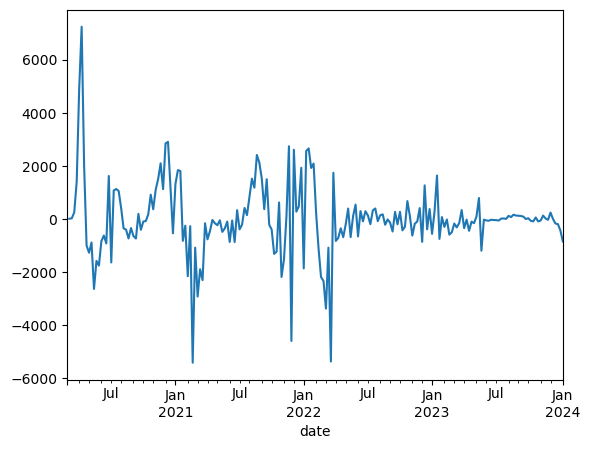

In [4]:
# checking stationarity
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
print(adfuller_test(us_uni['new_deaths']))
print(adfuller_test(us_diff['new_deaths'].dropna()))
us_diff['new_deaths'].plot()

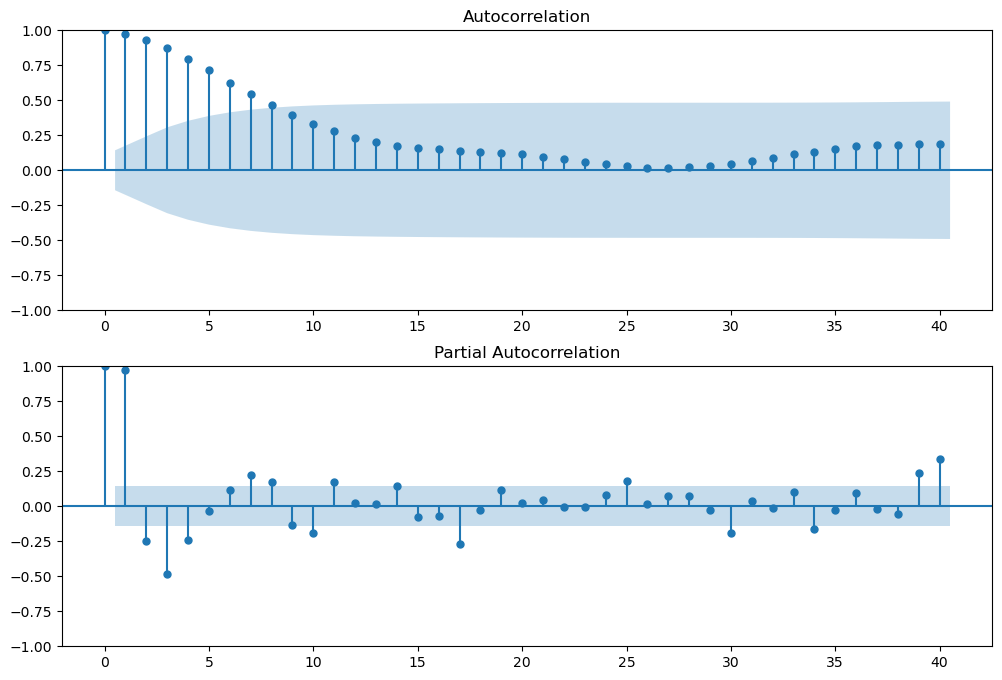

In [20]:
# ACF and PACF plots
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(us_uni['new_deaths'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(us_uni['new_deaths'].iloc[13:],lags=40,ax=ax2)

# Building ARIMA

In [82]:
# For non-seasonal data, baseline
#p=1, d=1, q=1 
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")

model = ARIMA(us_train['new_deaths'], order=(1,1,1))
model_fit = model.fit()
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             new_deaths   No. Observations:                  161
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1383.621
Date:                Fri, 23 Feb 2024   AIC                           2773.241
Time:                        16:44:09   BIC                           2782.467
Sample:                    03-01-2020   HQIC                          2776.987
                         - 03-26-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7212      0.099      7.311      0.000       0.528       0.915
ma.L1         -0.4032      0.118     -3.409      0.001      -0.635      -0.171
sigma2      1.953e+06   1.31e+05     14.882      0.000     1.7e+06    2.21e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.89   Jarque-Bera (JB):               115.67
Prob(Q):                              0.35   Prob(JB):                         0.00
Heteroskedasticity (H):               0.21   Skew:                            -0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Text(0, 0.5, 'New Deaths')

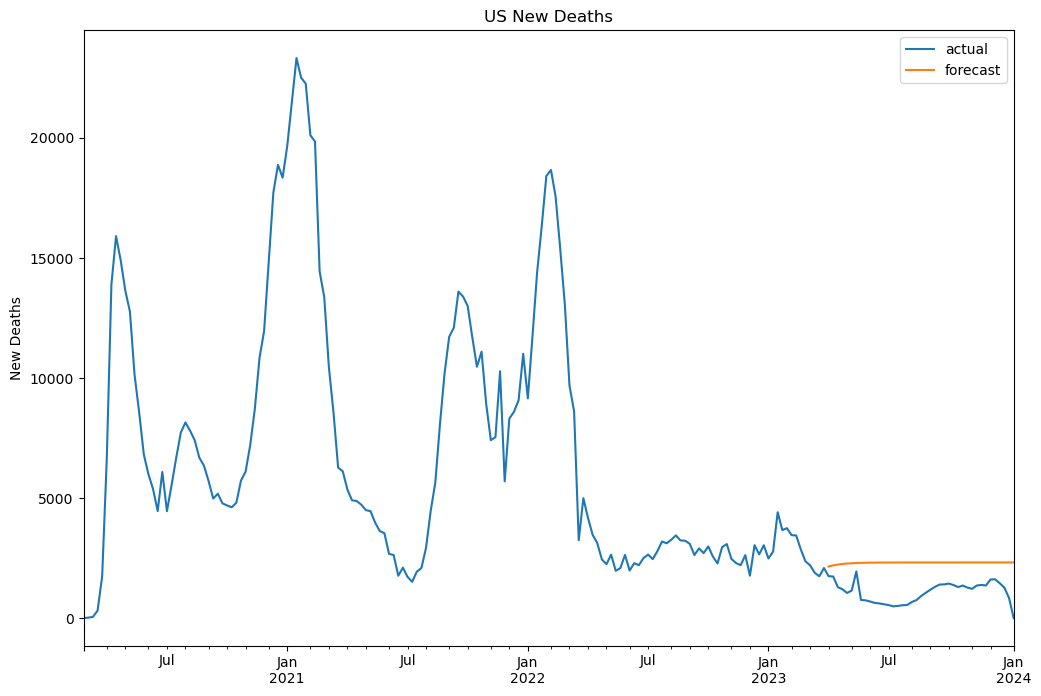

In [83]:
# evaluation 
us_prediction=model_fit.predict(start=train_size,end = 201, dynamic=True)
df = pd.concat([us['new_deaths'],us_prediction], axis=1)
df.columns = ['actual','forecast']
df.plot(figsize=(12,8))
# plot title and labels
plt.title('US New Deaths')
plt.ylabel('New Deaths')

## Grid Search for p and q 

    p  q          aic
8   3  1  2760.695665
12  4  1  2761.729031
6   2  3  2761.801169
9   3  2  2764.224333
10  3  3  2764.441508
5   2  2  2766.820785
1   1  2  2767.592021
13  4  2  2767.732277
14  4  3  2768.046407
4   2  1  2768.639997
3   1  4  2769.064076
7   2  4  2769.105643
11  3  4  2772.818542
2   1  3  2772.850511
0   1  1  2773.241203
15  4  4  2773.441903


Text(0, 0.5, 'New Deaths')

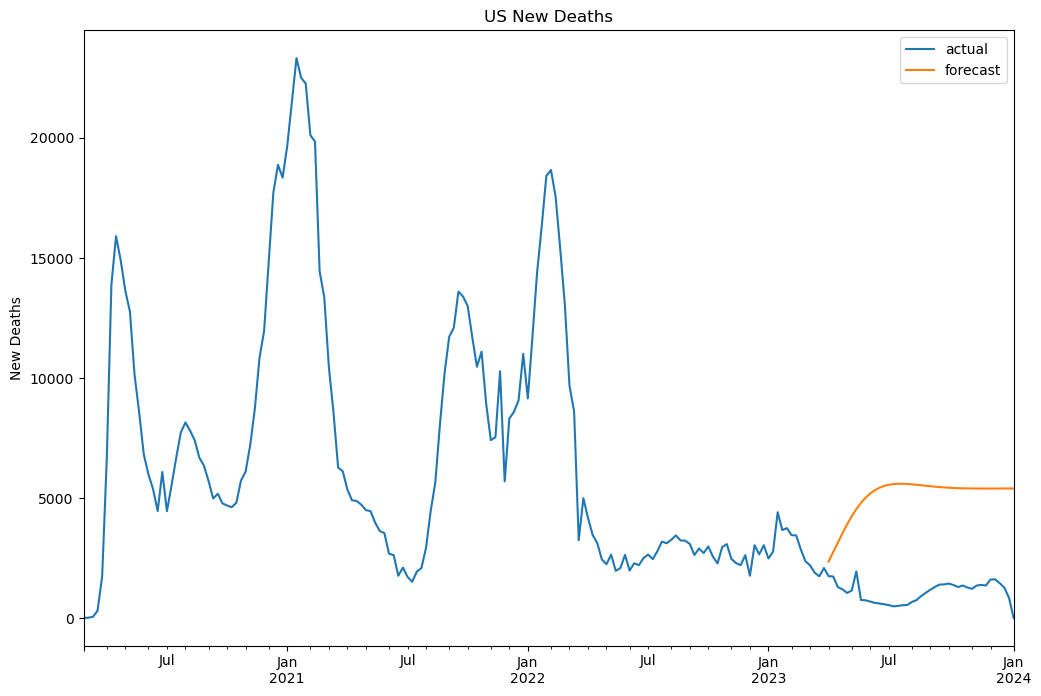

In [94]:
# grid search for p and q
results = []
for p in range(1,5):
    for q in range(1,5): 
        model = ARIMA(us_train['new_deaths'], order=(p,1,q)).fit()
        results.append([p,q,model.aic])
results_df = pd.DataFrame(results)
results_df.columns = ['p','q','aic']
results_df = results_df.sort_values('aic')
print(results_df)
p,q,= results_df.iloc[0,0], results_df.iloc[0,1]

#model building
model = ARIMA(us_train['new_deaths'], order=(p,1,q))
model_fit = model.fit()

us_prediction = model_fit.predict(start=train_size, end = 201,dynamic=True)
df = pd.concat([us_uni['new_deaths'],us_prediction], axis=1)
df.columns = ['actual','forecast']
df.plot(figsize=(12,8))
# plot title and labels
plt.title('US New Deaths')
plt.ylabel('New Deaths')

## Seaonality

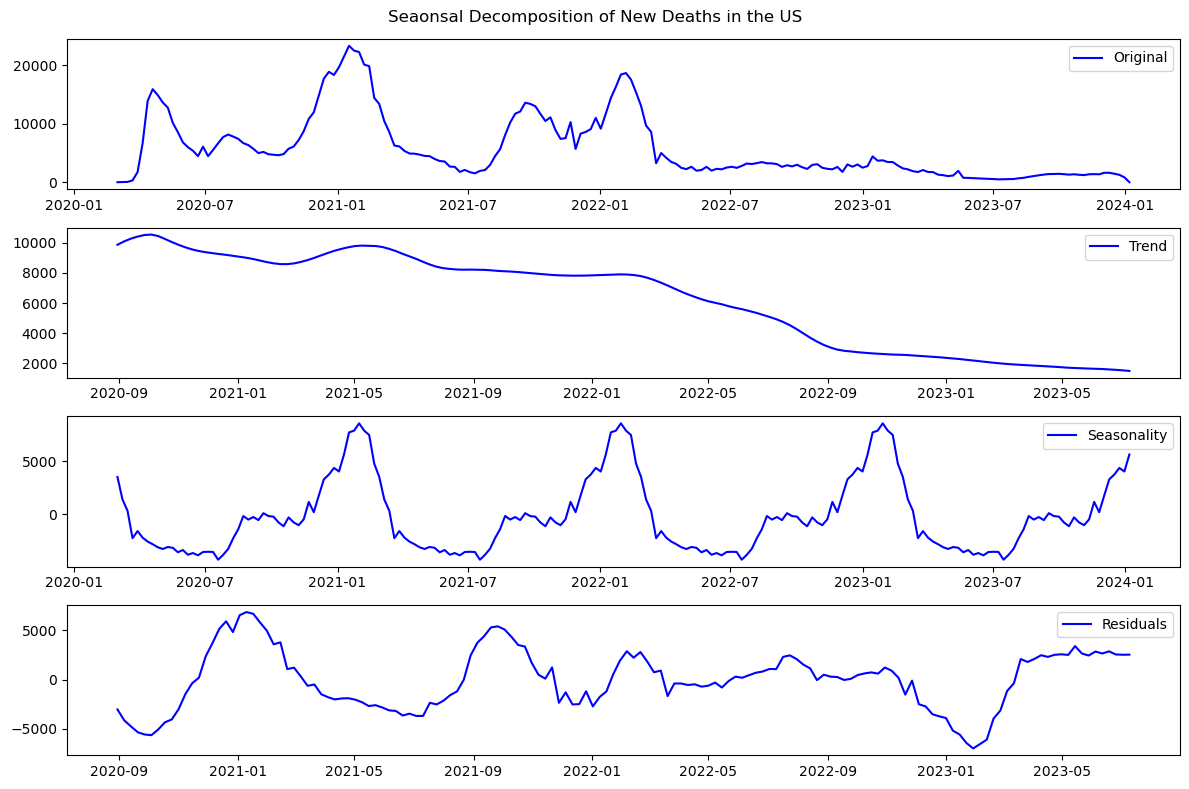

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
decomposition = seasonal_decompose(us_uni, period=52) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(us_uni['new_deaths'], label='Original', color='blue')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color='blue')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='blue')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='blue')
plt.legend(loc='best')
plt.suptitle('Seaonsal Decomposition of New Deaths in the US')
plt.tight_layout()

In [35]:
# grid search
import warnings
import statsmodels.api 
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore",category =  UserWarning)
warnings.filterwarnings("ignore",category = statsmodels.tools.sm_exceptions.ValueWarning)
if 1:
    results=[]
    for p in range(1,3):
        for q in range(1,3):
            for P in range(1,3):
                for Q in range(1,3):
                    model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p,1,q), seasonal_order=(P,1,Q,12)).fit()
                    results.append([p,q,P,Q,model.aic])
df_results = pd.DataFrame(results, columns=['p', 'q', 'P', 'Q', 'aic']).sort_values('aic')
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,12))
model_fit=model.fit()
us_prediction = model_fit.predict(start=train_size, end=201, dynamic=True)
df['forecast'] = us_prediction

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.10618D+00    |proj g|=  5.68892D-02


 This problem is unconstrained.



At iterate    5    f=  8.07724D+00    |proj g|=  3.41003D-03

At iterate   10    f=  8.07682D+00    |proj g|=  2.39189D-04

At iterate   15    f=  8.07659D+00    |proj g|=  7.02843D-03

At iterate   20    f=  8.04616D+00    |proj g|=  9.88944D-02

At iterate   25    f=  7.97704D+00    |proj g|=  1.89722D-02

At iterate   30    f=  7.96607D+00    |proj g|=  2.22967D-03

At iterate   35    f=  7.96500D+00    |proj g|=  1.49587D-03

At iterate   40    f=  7.96486D+00    |proj g|=  1.00152D-03

At iterate   45    f=  7.96483D+00    |proj g|=  2.03828D-04

At iterate   50    f=  7.96483D+00    |proj g|=  7.81142D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.09193D+00    |proj g|=  4.63920D-02

At iterate    5    f=  8.07917D+00    |proj g|=  4.77792D-03

At iterate   10    f=  8.07523D+00    |proj g|=  1.00200D-02

At iterate   15    f=  8.07476D+00    |proj g|=  2.41484D-04

At iterate   20    f=  8.07473D+00    |proj g|=  2.92660D-03

At iterate   25    f=  8.06931D+00    |proj g|=  3.32207D-02

At iterate   30    f=  7.98427D+00    |proj g|=  5.41329D-02

At iterate   35    f=  7.97765D+00    |proj g|=  2.19744D-02

At iterate   40    f=  7.96591D+00    |proj g|=  1.15051D-02

At iterate   45    f=  7.96510D+00    |proj g|=  1.26048D-04

At iterate   50    f=  7.96509D+00    |proj g|=  2.07081D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate   10    f=  8.07388D+00    |proj g|=  1.56193D-03

At iterate   15    f=  8.07385D+00    |proj g|=  8.13810D-04

At iterate   20    f=  8.07329D+00    |proj g|=  1.48492D-02

At iterate   25    f=  8.02708D+00    |proj g|=  1.82228D-01

At iterate   30    f=  7.96120D+00    |proj g|=  2.54900D-02

At iterate   35    f=  7.96027D+00    |proj g|=  3.85640D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     37     41      1     0     0   3.154D-06   7.960D+00
  F =   7.9602675730412313     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate    5    f=  8.07392D+00    |proj g|=  4.86893D-03

At iterate   10    f=  8.07299D+00    |proj g|=  7.54208D-04

At iterate   15    f=  8.07289D+00    |proj g|=  1.15664D-03

At iterate   20    f=  8.07288D+00    |proj g|=  6.51698D-04

At iterate   25    f=  8.07268D+00    |proj g|=  7.98905D-03

At iterate   30    f=  8.06087D+00    |proj g|=  2.15905D-02

At iterate   35    f=  7.99247D+00    |proj g|=  2.76091D-02

At iterate   40    f=  7.96189D+00    |proj g|=  1.14805D-02

At iterate   45    f=  7.96114D+00    |proj g|=  1.73134D-02

At iterate   50    f=  7.95944D+00    |proj g|=  3.13177D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.98807D+00    |proj g|=  1.77764D-03

At iterate   10    f=  7.98802D+00    |proj g|=  2.22334D-04

At iterate   15    f=  7.98800D+00    |proj g|=  1.59183D-03

At iterate   20    f=  7.98556D+00    |proj g|=  4.09312D-02

At iterate   25    f=  7.93910D+00    |proj g|=  4.23384D-02

At iterate   30    f=  7.92542D+00    |proj g|=  3.59467D-02

At iterate   35    f=  7.92385D+00    |proj g|=  4.89794D-03

At iterate   40    f=  7.92352D+00    |proj g|=  1.40350D-03

At iterate   45    f=  7.92348D+00    |proj g|=  1.16653D-03

At iterate   50    f=  7.92347D+00    |proj g|=  1.13914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.99051D+00    |proj g|=  7.41180D-03

At iterate   10    f=  7.98890D+00    |proj g|=  2.68988D-02

At iterate   15    f=  7.98592D+00    |proj g|=  2.38728D-03

At iterate   20    f=  7.98590D+00    |proj g|=  2.24956D-04

At iterate   25    f=  7.98560D+00    |proj g|=  5.69606D-03

At iterate   30    f=  7.93264D+00    |proj g|=  1.18615D-02

At iterate   35    f=  7.93038D+00    |proj g|=  4.80921D-03

At iterate   40    f=  7.93017D+00    |proj g|=  1.03704D-03

At iterate   45    f=  7.92977D+00    |proj g|=  5.75162D-03

At iterate   50    f=  7.92971D+00    |proj g|=  1.78192D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.99223D+00    |proj g|=  6.89601D-02

At iterate   10    f=  7.98526D+00    |proj g|=  8.09845D-04

At iterate   15    f=  7.98525D+00    |proj g|=  2.25800D-04

At iterate   20    f=  7.98518D+00    |proj g|=  4.20581D-03

At iterate   25    f=  7.97680D+00    |proj g|=  4.65648D-02

At iterate   30    f=  7.93501D+00    |proj g|=  3.05568D-02

At iterate   35    f=  7.91965D+00    |proj g|=  1.92907D-03

At iterate   40    f=  7.91963D+00    |proj g|=  8.59451D-04

At iterate   45    f=  7.91952D+00    |proj g|=  1.03012D-03

At iterate   50    f=  7.91950D+00    |proj g|=  7.76689D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.00077D+00    |proj g|=  1.09565D-01

At iterate    5    f=  7.98467D+00    |proj g|=  2.85792D-03

At iterate   10    f=  7.98464D+00    |proj g|=  1.23594D-03

At iterate   15    f=  7.98453D+00    |proj g|=  1.44961D-03

At iterate   20    f=  7.98451D+00    |proj g|=  2.26612D-04

At iterate   25    f=  7.98447D+00    |proj g|=  1.63228D-03

At iterate   30    f=  7.98015D+00    |proj g|=  3.24268D-02

At iterate   35    f=  7.93481D+00    |proj g|=  3.77310D-02

At iterate   40    f=  7.92339D+00    |proj g|=  5.15776D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05988D+00    |proj g|=  4.55810D-02

At iterate    5    f=  8.03701D+00    |proj g|=  3.48180D-03

At iterate   10    f=  8.03671D+00    |proj g|=  2.46288D-04

At iterate   15    f=  8.03667D+00    |proj g|=  3.07712D-03

At iterate   20    f=  8.02835D+00    |proj g|=  4.38670D-02

At iterate   25    f=  7.97875D+00    |proj g|=  3.17119D-02

At iterate   30    f=  7.94581D+00    |proj g|=  1.18994D-01

At iterate   35    f=  7.93028D+00    |proj g|=  1.09212D-03

At iterate   40    f=  7.93028D+00    |proj g|=  1.61925D-03

At iterate   45    f=  7.93024D+00    |proj g|=  7.13481D-04

At iterate   50    f=  7.93023D+00    |proj g|=  2.49042D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  8.03876D+00    |proj g|=  4.60057D-03

At iterate   10    f=  8.03676D+00    |proj g|=  6.71813D-03

At iterate   15    f=  8.03517D+00    |proj g|=  1.69322D-03

At iterate   20    f=  8.03514D+00    |proj g|=  2.48239D-04

At iterate   25    f=  8.03501D+00    |proj g|=  3.89442D-03

At iterate   30    f=  8.01437D+00    |proj g|=  7.02979D-02

At iterate   35    f=  7.97178D+00    |proj g|=  2.82594D-02

At iterate   40    f=  7.93673D+00    |proj g|=  4.02999D-03

At iterate   45    f=  7.93669D+00    |proj g|=  3.76326D-04

At iterate   50    f=  7.93659D+00    |proj g|=  9.73572D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.03762D+00    |proj g|=  3.98928D-02

At iterate   10    f=  8.03450D+00    |proj g|=  3.55344D-04

At iterate   15    f=  8.03449D+00    |proj g|=  5.94063D-04

At iterate   20    f=  8.03394D+00    |proj g|=  1.51112D-02

At iterate   25    f=  7.98510D+00    |proj g|=  1.79520D-01

At iterate   30    f=  7.92983D+00    |proj g|=  8.97031D-03

At iterate   35    f=  7.92708D+00    |proj g|=  4.40959D-03

At iterate   40    f=  7.92677D+00    |proj g|=  1.69185D-03

At iterate   45    f=  7.92673D+00    |proj g|=  5.39352D-04

At iterate   50    f=  7.92672D+00    |proj g|=  2.18317D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  8.03432D+00    |proj g|=  1.50417D-02

At iterate   10    f=  8.03363D+00    |proj g|=  4.27193D-04

At iterate   15    f=  8.03357D+00    |proj g|=  4.30056D-03

At iterate   20    f=  8.03351D+00    |proj g|=  5.13103D-04

At iterate   25    f=  8.03341D+00    |proj g|=  5.12963D-03

At iterate   30    f=  8.02926D+00    |proj g|=  2.66240D-02

At iterate   35    f=  7.93170D+00    |proj g|=  5.05079D-02

At iterate   40    f=  7.92945D+00    |proj g|=  2.83963D-04

At iterate   45    f=  7.92943D+00    |proj g|=  2.18776D-03

At iterate   50    f=  7.92661D+00    |proj g|=  1.26076D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.98786D+00    |proj g|=  3.46527D-03

At iterate   10    f=  7.98772D+00    |proj g|=  2.41275D-04

At iterate   15    f=  7.98771D+00    |proj g|=  2.22242D-04

At iterate   20    f=  7.98762D+00    |proj g|=  3.99721D-03

At iterate   25    f=  7.98292D+00    |proj g|=  2.04214D-02

At iterate   30    f=  7.92496D+00    |proj g|=  1.72304D-02

At iterate   35    f=  7.92345D+00    |proj g|=  1.30105D-02

At iterate   40    f=  7.92327D+00    |proj g|=  1.50368D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     41     47      1     0     0   4.136D-06   7.923D+00
  F =   7.92327450109

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.99547D+00    |proj g|=  4.66547D-02

At iterate    5    f=  7.99004D+00    |proj g|=  3.69584D-03

At iterate   10    f=  7.98569D+00    |proj g|=  7.03056D-03

At iterate   15    f=  7.98560D+00    |proj g|=  1.52791D-03

At iterate   20    f=  7.98557D+00    |proj g|=  1.64417D-03

At iterate   25    f=  7.98556D+00    |proj g|=  8.22450D-04

At iterate   30    f=  7.98528D+00    |proj g|=  1.02322D-02

At iterate   35    f=  7.97842D+00    |proj g|=  1.63784D-02

At iterate   40    f=  7.94887D+00    |proj g|=  5.93390D-02

At iterate   45    f=  7.92973D+00    |proj g|=  3.27578D-03

At iterate   50    f=  7.92969D+00    |proj g|=  1.91016D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

 This problem is unconstrained.



At iterate    5    f=  7.98847D+00    |proj g|=  3.83311D-02

At iterate   10    f=  7.98494D+00    |proj g|=  5.62553D-04

At iterate   15    f=  7.98492D+00    |proj g|=  1.00670D-03

At iterate   20    f=  7.98492D+00    |proj g|=  4.44545D-04

At iterate   25    f=  7.98475D+00    |proj g|=  7.24470D-03

At iterate   30    f=  7.97110D+00    |proj g|=  3.79825D-02

At iterate   35    f=  7.92769D+00    |proj g|=  2.58356D-02

At iterate   40    f=  7.92238D+00    |proj g|=  7.17185D-03

At iterate   45    f=  7.92185D+00    |proj g|=  1.02199D-03

At iterate   50    f=  7.92185D+00    |proj g|=  2.79764D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  7.98433D+00    |proj g|=  2.73172D-03

At iterate   10    f=  7.98425D+00    |proj g|=  1.56513D-03

At iterate   15    f=  7.98418D+00    |proj g|=  1.44918D-03

At iterate   20    f=  7.98412D+00    |proj g|=  8.27880D-04

At iterate   25    f=  7.98410D+00    |proj g|=  1.65047D-03

At iterate   30    f=  7.98308D+00    |proj g|=  9.19147D-03

At iterate   35    f=  7.95798D+00    |proj g|=  1.28183D-01

At iterate   40    f=  7.92350D+00    |proj g|=  1.90785D-02

At iterate   45    f=  7.92229D+00    |proj g|=  2.12707D-03

At iterate   50    f=  7.92213D+00    |proj g|=  5.34609D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

,p,q,P,Q,aic
4,1,2,1,1,2563.358531
6,1,2,2,1,2564.077528
12,2,2,1,1,2565.294389
8,2,1,1,1,2565.533526
10,2,1,2,1,2566.405249
14,2,2,2,1,2566.834648
7,1,2,2,2,2567.330827
5,1,2,1,2,2567.367283
11,2,1,2,2,2568.368552
15,2,2,2,2,2568.924545


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.01828D+00    |proj g|=  6.45009D-02

At iterate    5    f=  7.98807D+00    |proj g|=  1.77764D-03


 This problem is unconstrained.



At iterate   10    f=  7.98802D+00    |proj g|=  2.22334D-04

At iterate   15    f=  7.98800D+00    |proj g|=  1.59183D-03

At iterate   20    f=  7.98556D+00    |proj g|=  4.09312D-02

At iterate   25    f=  7.93910D+00    |proj g|=  4.23384D-02

At iterate   30    f=  7.92542D+00    |proj g|=  3.59467D-02

At iterate   35    f=  7.92385D+00    |proj g|=  4.89794D-03

At iterate   40    f=  7.92352D+00    |proj g|=  1.40350D-03

At iterate   45    f=  7.92348D+00    |proj g|=  1.16653D-03

At iterate   50    f=  7.92347D+00    |proj g|=  1.13914D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     50     56   

Text(0, 0.5, 'New Deaths')

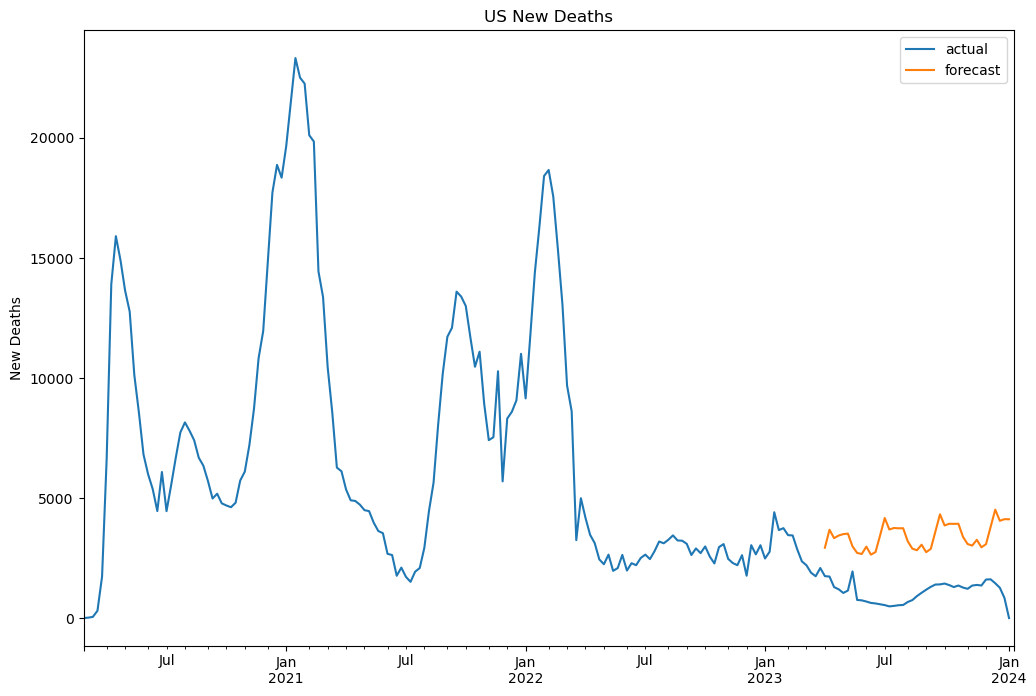

In [76]:
# tuned model 
p,q,P,Q = df_results.iloc[0,0], df_results.iloc[0,1], df_results.iloc[0,2], df_results.iloc[0,3]
model=sm.tsa.statespace.SARIMAX(us_train['new_deaths'],order=(p, 1, q),seasonal_order=(P,1,Q,12))
model_fit=model.fit()
us_prediction = model_fit.predict(start=train_size, end=201, dynamic=True)
df['forecast'] = us_prediction
df.plot(figsize=(12,8))
# plot title and labels
plt.title('US New Deaths')
plt.ylabel('New Deaths')